In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import os
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.chdir(r'F:\Work\Данные для виртуальной расходометрии\Данные Мессояха\Мессояха\Скважины')
data_period = 212 # количество дней в выгрузке

In [3]:
def plotting(data, label):
    #hits = np.histogram(temp_data)[0]
    #for n in hits:
        #if n > 0:
    plt.figure(figsize(20,10))
    plt.plot(data)
    plt.title(label)
    plt.savefig('%s.jpg' % (str(label)), quality=100)
    plt.close()

In [4]:
def scatter_plot(data, filename):
    label = filename[:-4]
    if filename == '1354.csv' or filename == '326.csv' or filename == '353.csv':
        x = data[[' Скважина ' + filename[:-4] + '. Активная мощность']].values
    elif filename == '252.csv':
        x = data[['важина ' + filename[:-4] + '. Активная мощность']].values        
    else:
        x = data[['Скважина ' + filename[:-4] + '. Активная мощность']].values
    y = data[['Мощность расчетная по фазе А']].values
    y_ = data[['Суммарная мощность']].values
    plt.figure(figsize(20,10))
    #plt.scatter(x, y)
    plt.scatter(x, y_)
    plt.xlabel('Скважина ' + filename[:-4] + '. Активная мощность')
    plt.ylabel('Расчетная мощность')
    plt.title(label)
    plt.savefig('%s.jpg' % (str(label)), quality=100)
    plt.close()

In [5]:
def plot_line_and_average(data, filename):
    label = 'Скважина ' + filename[:-4] + ' Активная мощность вместе с усредненной за сутки'
    if filename == '1354.csv' or filename == '326.csv' or filename == '353.csv':
        x = data[[' Скважина ' + filename[:-4] + '. Активная мощность']].dropna()
    elif filename == '252.csv':
        x = data[['важина ' + filename[:-4] + '. Активная мощность']].dropna()
    else:
        x = data[['Скважина ' + filename[:-4] + '. Активная мощность']].dropna()
    
    plt.figure(figsize(20,10))
    plt.plot(x)
    x = x.groupby(pd.Grouper(level='Дата', freq='1D')).mean()
    plt.plot(x, c='r', marker='o')
    plt.title(label)
    plt.legend(['Активная мощность', 'Усреднение за сутки'])
    plt.savefig('%s.jpg' % (str(label)), quality=100)
    plt.close()

In [6]:
def plot_hist(data, filename):
    if filename == '1354.csv' or filename == '326.csv' or filename == '353.csv':
        vibrations = data[[' Скважина ' + filename[:-4] + '. Вибрация насоса по оси X',
                         ' Скважина ' + filename[:-4] + '. Вибрация насоса по оси Y', 
                         ' Скважина ' + filename[:-4] + '. Виброускорение (результирующий вектор)']]

    elif filename == '252.csv':
        vibrations = data[['важина ' + filename[:-4] + '. Вибрация насоса по оси X',
                         'важина ' + filename[:-4] + '. Вибрация насоса по оси Y', 
                         'важина ' + filename[:-4] + '. Виброускорение (результирующий вектор)']]
        
    else:
        vibrations = data[['Скважина ' + filename[:-4] + '. Вибрация насоса по оси X',
                         'Скважина ' + filename[:-4] + '. Вибрация насоса по оси Y', 
                         'Скважина ' + filename[:-4] + '. Виброускорение (результирующий вектор)']]
    
    for column in vibrations.columns:
        plt.figure(figsize(20,10))
        plt.hist(vibrations[column].dropna().values)
        plt.title(column)
        plt.savefig(column + '.jpg')
       # plt.close()

In [7]:
def get_well_data(filename):
    data = pd.read_csv(filename, header = None, sep = ";")
    if filename == '1354.csv' or filename == '353.csv':
        data.drop(columns = [0], inplace=True)
        data.columns = range(data.shape[1])
    data.dropna(inplace = True)
    well_params = data[0].unique()
    data_new = pd.DataFrame(columns = well_params)
    data_new.insert(loc = 0, column = 'Дата', value = '' )
    pd.set_option('max_rows', 1000)
    d = dict()
    for wells in well_params:
        d['Дата'] = data[1].values
        d[wells] = data.loc[data[0] == wells][2]
    data_new = pd.DataFrame.from_dict(d)
    data_new['Дата'] = pd.to_datetime(data_new['Дата'])
    data_new = data_new.set_index(['Дата'])
    columns = data_new.columns
    for col in columns:
        data_new.rename(columns={col : col[17:]}, inplace=True)   
    return data_new

In [8]:
def download_STR():
    f = open('F:\Work\Данные для виртуальной расходометрии\Данные Мессояха\Мессояха\Авг18-Фев19 ВЧ скв без ВЧ зам.csv')
    df = pd.read_csv(f, index_col = 0, sep=';', encoding='utf8')
    f.close()
    return df
    
    

In [9]:
def get_column_from_STR(data, df, filename):
    df = df.loc[[int(filename[:-4])]]
    df = df[['Дата', 'Давление линейное (ТМ)']]
    df['Дата'] = pd.to_datetime(df['Дата'])
    df = df.set_index(['Дата'])
    #df = df.groupby(pd.Grouper(level='Дата', freq='1D')).mean().dropna()

    return  pd.concat([data, df], axis=1, join_axes=[data.index]) 


In [10]:
def get_debit_freq(data, filename):
    if filename == '1354.csv' or filename == '326.csv' or filename == '353.csv':
        return len(data[' Скважина ' + filename[:-4] + '. Объемный дебит нефти'].dropna())/data_period
    elif filename == '252.csv':
        return len(data['важина ' + filename[:-4] + '. Объемный дебит нефти'].dropna())/data_period
    else:
        return len(data['Скважина ' + filename[:-4] + '. Объемный дебит нефти'].dropna())/data_period


In [11]:
def get_correlation(data, filename):
    corr = data.corr(method = 'pearson')
    sns.set(font_scale=3)
    if filename == '1354.csv' or filename == '326.csv' or filename == '353.csv':
        
        corr = corr.loc[[' Скважина ' + filename[:-4] + '. Активная мощность', 'Суммарная мощность']]
                
        corr = corr.drop(columns=[' Скважина ' + filename[:-4] + '. Ток фазы В',' Скважина ' + filename[:-4] + '. Ток фазы С', 
                                  ' Скважина ' + filename[:-4] + '. Входное напряжение ВС',
                                  ' Скважина ' + filename[:-4] + '. Входное напряжение СА'])
        corr = corr[abs(corr.loc[corr.columns]) > 0.4] #Оставляем только корреляции больше 0,5 по модулю
        
        corr = corr.dropna(axis = 1, how='all')       
    elif filename == '252.csv':        

        corr = corr.loc[['важина ' + filename[:-4] + '. Активная мощность', 'Суммарная мощность']]
        
        
        corr = corr.drop(columns=['важина ' + filename[:-4] + '. Ток фазы В','важина ' + filename[:-4] + '. Ток фазы С', 
                                  'важина ' + filename[:-4] + '. Входное напряжение ВС',
                                  'важина ' + filename[:-4] + '. Входное напряжение СА'])        
        corr = corr[abs(corr.loc[corr.columns]) > 0.4]
        
        corr = corr.dropna(axis = 1, how='all')
    else:
         
        corr = corr.loc[['Скважина ' + filename[:-4] + '. Активная мощность', 'Суммарная мощность']]
        
        corr = corr.drop(columns=['Скважина ' + filename[:-4] + '. Ток фазы В', 'Скважина ' + filename[:-4] + '. Ток фазы С', 
                                  'Скважина ' + filename[:-4] + '. Входное напряжение ВС',
                                  'Скважина ' + filename[:-4] + '. Входное напряжение СА']) 
        corr = corr[abs(corr.loc[corr.columns]) > 0.4]
        
        corr = corr.dropna(axis = 1, how='all')
        
    corr = corr.drop(columns = ['Мощность расчетная по фазе С', 'Мощность расчетная по фазе В'])
    fig, ax = plt.subplots(figsize=(50,30))         # Sample figsize in inches
    
    sns_plot = sns.heatmap(corr, annot=True,  annot_kws={"size": 30, 'rotation': 90}, linewidths=.1, ax=ax)
    fig = sns_plot.get_figure()
    fig.savefig('Корреляции мощностей по скважине ' +  filename[:-4] + '.jpg',  bbox_inches="tight")
    plt.close()

In [12]:
def add_new_columns(data, filename):
   
    if filename == '1354.csv' or filename == '326.csv' or filename == '353.csv':
        columns=[' Скважина ' + filename[:-4] + '. Ток фазы А', ' Скважина ' + filename[:-4] + '. Ток фазы В',
                 ' Скважина ' + filename[:-4] + '. Ток фазы С', ' Скважина ' + filename[:-4] + '. Входное напряжение АВ',
                 ' Скважина ' + filename[:-4] + '. Входное напряжение ВС', ' Скважина ' + filename[:-4] + '. Входное напряжение СА',
                 ' Скважина ' + filename[:-4] + '. Коэффициент мощности', ' Скважина ' + filename[:-4] + '. Выходная частота ПЧ',
                 ' Скважина ' + filename[:-4] + '. Давление на приеме насоса (пласт. жидкость)',
                 ' Скважина ' + filename[:-4] + '. Объемный дебит жидкости', 'Давление линейное (ТМ)']
    
    elif filename == '252.csv':
        columns=['важина ' + filename[:-4] + '. Ток фазы А', 'важина ' + filename[:-4] + '. Ток фазы В',
                 'важина ' + filename[:-4] + '. Ток фазы С', 'важина ' + filename[:-4] + '. Входное напряжение АВ',
                 'важина ' + filename[:-4] + '. Входное напряжение ВС', 'важина ' + filename[:-4] + '. Входное напряжение СА',
                 'важина ' + filename[:-4] + '. Коэффициент мощности', 'важина ' + filename[:-4] + '. Выходная частота ПЧ',
                 'важина ' + filename[:-4] + '. Давление на приеме насоса (пласт. жидкость)',
                 'важина ' + filename[:-4] + '. Объемный дебит жидкости', 'Давление линейное (ТМ)']
    else:
        columns=['Скважина ' + filename[:-4] + '. Ток фазы А', 'Скважина ' + filename[:-4] + '. Ток фазы В',
                 'Скважина ' + filename[:-4] + '. Ток фазы С', 'Скважина ' + filename[:-4] + '. Входное напряжение АВ',
                 'Скважина ' + filename[:-4] + '. Входное напряжение ВС', 'Скважина ' + filename[:-4] + '. Входное напряжение СА',
                 'Скважина ' + filename[:-4] + '. Коэффициент мощности', 'Скважина ' + filename[:-4] + '. Выходная частота ПЧ',
                 'Скважина ' + filename[:-4] + '. Давление на приеме насоса (пласт. жидкость)', 
                 'Скважина ' + filename[:-4] + '. Объемный дебит жидкости', 'Давление линейное (ТМ)']

    df = pd.DataFrame(data[columns]) #df = data[columns] #.groupby(data[columns].index.to_period('H')).mean()               
    
    temp_power_A = np.multiply(df.iloc[:, [0]], df.iloc[:,[3]]).values
    temp_power_B = np.multiply(df.iloc[:, [1]], df.iloc[:,[4]]).values
    temp_power_C = np.multiply(df.iloc[:, [2]], df.iloc[:,[5]]).values
    
    test_value_U2_A = np.multiply(df.iloc[:, [3]], df.iloc[:,[3]]).values
    test_value_F_A = np.multiply(df.iloc[:, [7]], df.iloc[:,[7]]).values
    test_value_F_A_fin =  np.multiply(test_value_F_A, df.iloc[:,[7]]).values
    
    pressure_inlet_atm = np.multiply(df.iloc[:, [8]], 9.869).values
        
    df['Мощность расчетная по фазе А'] = np.multiply(temp_power_A, df.iloc[:, [6]])/1000
    df['Мощность расчетная по фазе В'] = np.multiply(temp_power_B, df.iloc[:, [6]])/1000
    df['Мощность расчетная по фазе С'] = np.multiply(temp_power_C, df.iloc[:, [6]])/1000
    df['Тест статьи (U^2 * f^3)'] = np.multiply(test_value_U2_A,  test_value_F_A_fin)
    df['Суммарная мощность'] = df['Мощность расчетная по фазе А'] + df['Мощность расчетная по фазе В'] + df['Мощность расчетная по фазе С']
    df['Давление на приеме x дебит ж-ти'] = np.multiply(df.iloc[:, [8]], df.iloc[:,[9]])
    df['Перепад давления (прием - устье)'] = pressure_inlet_atm - df[['Давление линейное (ТМ)']].values
    df['Перепад давления (прием - устье) x дебит ж-ти'] = np.multiply(df.iloc[:, [9]], df.iloc[:,[17]])
    #df.index = df.index.to_timestamp()
    df.drop(columns = columns, inplace=True)
    result = pd.concat([data, df], axis=1, join_axes=[data.index])
    return result

In [13]:
filenames = []
for file in os.listdir(os.getcwd()):
    filenames.append(file)
print(filenames)

['1354.csv', '1479.csv', '1509.csv', '1540.csv', '1567.csv', '1602.csv', '1628.csv', '202.csv', '252.csv', '326.csv', '353.csv', '507.csv', '540.csv', '569.csv', '570.csv', '601.csv', '627.csv', '658.csv', '689.csv', '693.csv']


In [15]:
df = download_STR()
for filename in filenames: 
    data = get_well_data(filename)
    plot_line_and_average(data, filename)
    #plot_hist(data, filename)
    
    #debit_freq = get_debit_freq(data, filename)
    #temp_data = pd.DataFrame(columns = data.columns)
    
    #for param in data.columns:
    #    temp_data = data[param].dropna()
    #plotting(temp_data, param)
    
    #deb_freq = get_debit_freq(data, filename)
    #print('Частота замеров дебита по скважине ' +  filename[:-4] + ' = ', deb_freq)
    
    #!data = data.groupby(pd.Grouper(level='Дата', freq='1D')).mean()
    
    #data = data.groupby(data.index.to_period('D')).mean()
    #data = get_column_from_STR(data, df, filename)
    #data = add_new_columns(data, filename)
    
   #temp_data = data[['Мощность расчетная по фазе А', 'Давление на приеме x дебит ж-ти', 'Перепад давления (прием - устье)', 
   #                 'Перепад давления (прием - устье) x дебит ж-ти']]
   #for param in temp_data.columns:
   #    plotting(temp_data[param].dropna(), 'Скважина ' + filename[:-4] + ' ' + param)
    #scatter_plot(data, filename)
    
    #get_correlation(data, filename)
        

Дата
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-08-01 00:00:00.000      NaN
2018-

In [37]:
data['Скважина 627. Активная мощность'].loc[(data.index >= '2019-02-16 00:00:00') & (data.index < '2019-02-17 00:00:00')].dropna().mean()


123.77589852008457

In [26]:
data.columns

Index(['Скважина 627. Затрубное давление', 'Скважина 627. Загрузка двигателя',
       'Скважина 627. Дисбаланс напряжений',
       'Скважина 627. Входное напряжение СА',
       'Скважина 627. Входное напряжение ВС',
       'Скважина 627. Входное напряжение АВ',
       'Скважина 627. Вибрация насоса по оси Y',
       'Скважина 627. Вибрация насоса по оси X',
       'Скважина 627. Виброускорение (результирующий вектор)',
       'Скважина 627. Напряжение на выходе ТМПН',
       'Скважина 627. Устьевое давление',
       'Скважина 627. Напряжение в звене постоянного тока',
       'Скважина 627. Напряжение на выходе ПЧ',
       'Скважина 627. Время замера плановое',
       'Скважина 627. Время замера фактическое',
       'Скважина 627. Потеря связи. 1 - Связи нет',
       'Скважина 627. Состояние насоса. 1 - В работе',
       'Скважина 627. Сопротивление изоляции',
       'Скважина 627. Температура на приеме насоса (пласт. жидкость)',
       'Скважина 627. Давление на приеме насоса (пласт. ж

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
F:\Anaconda\lib\sit

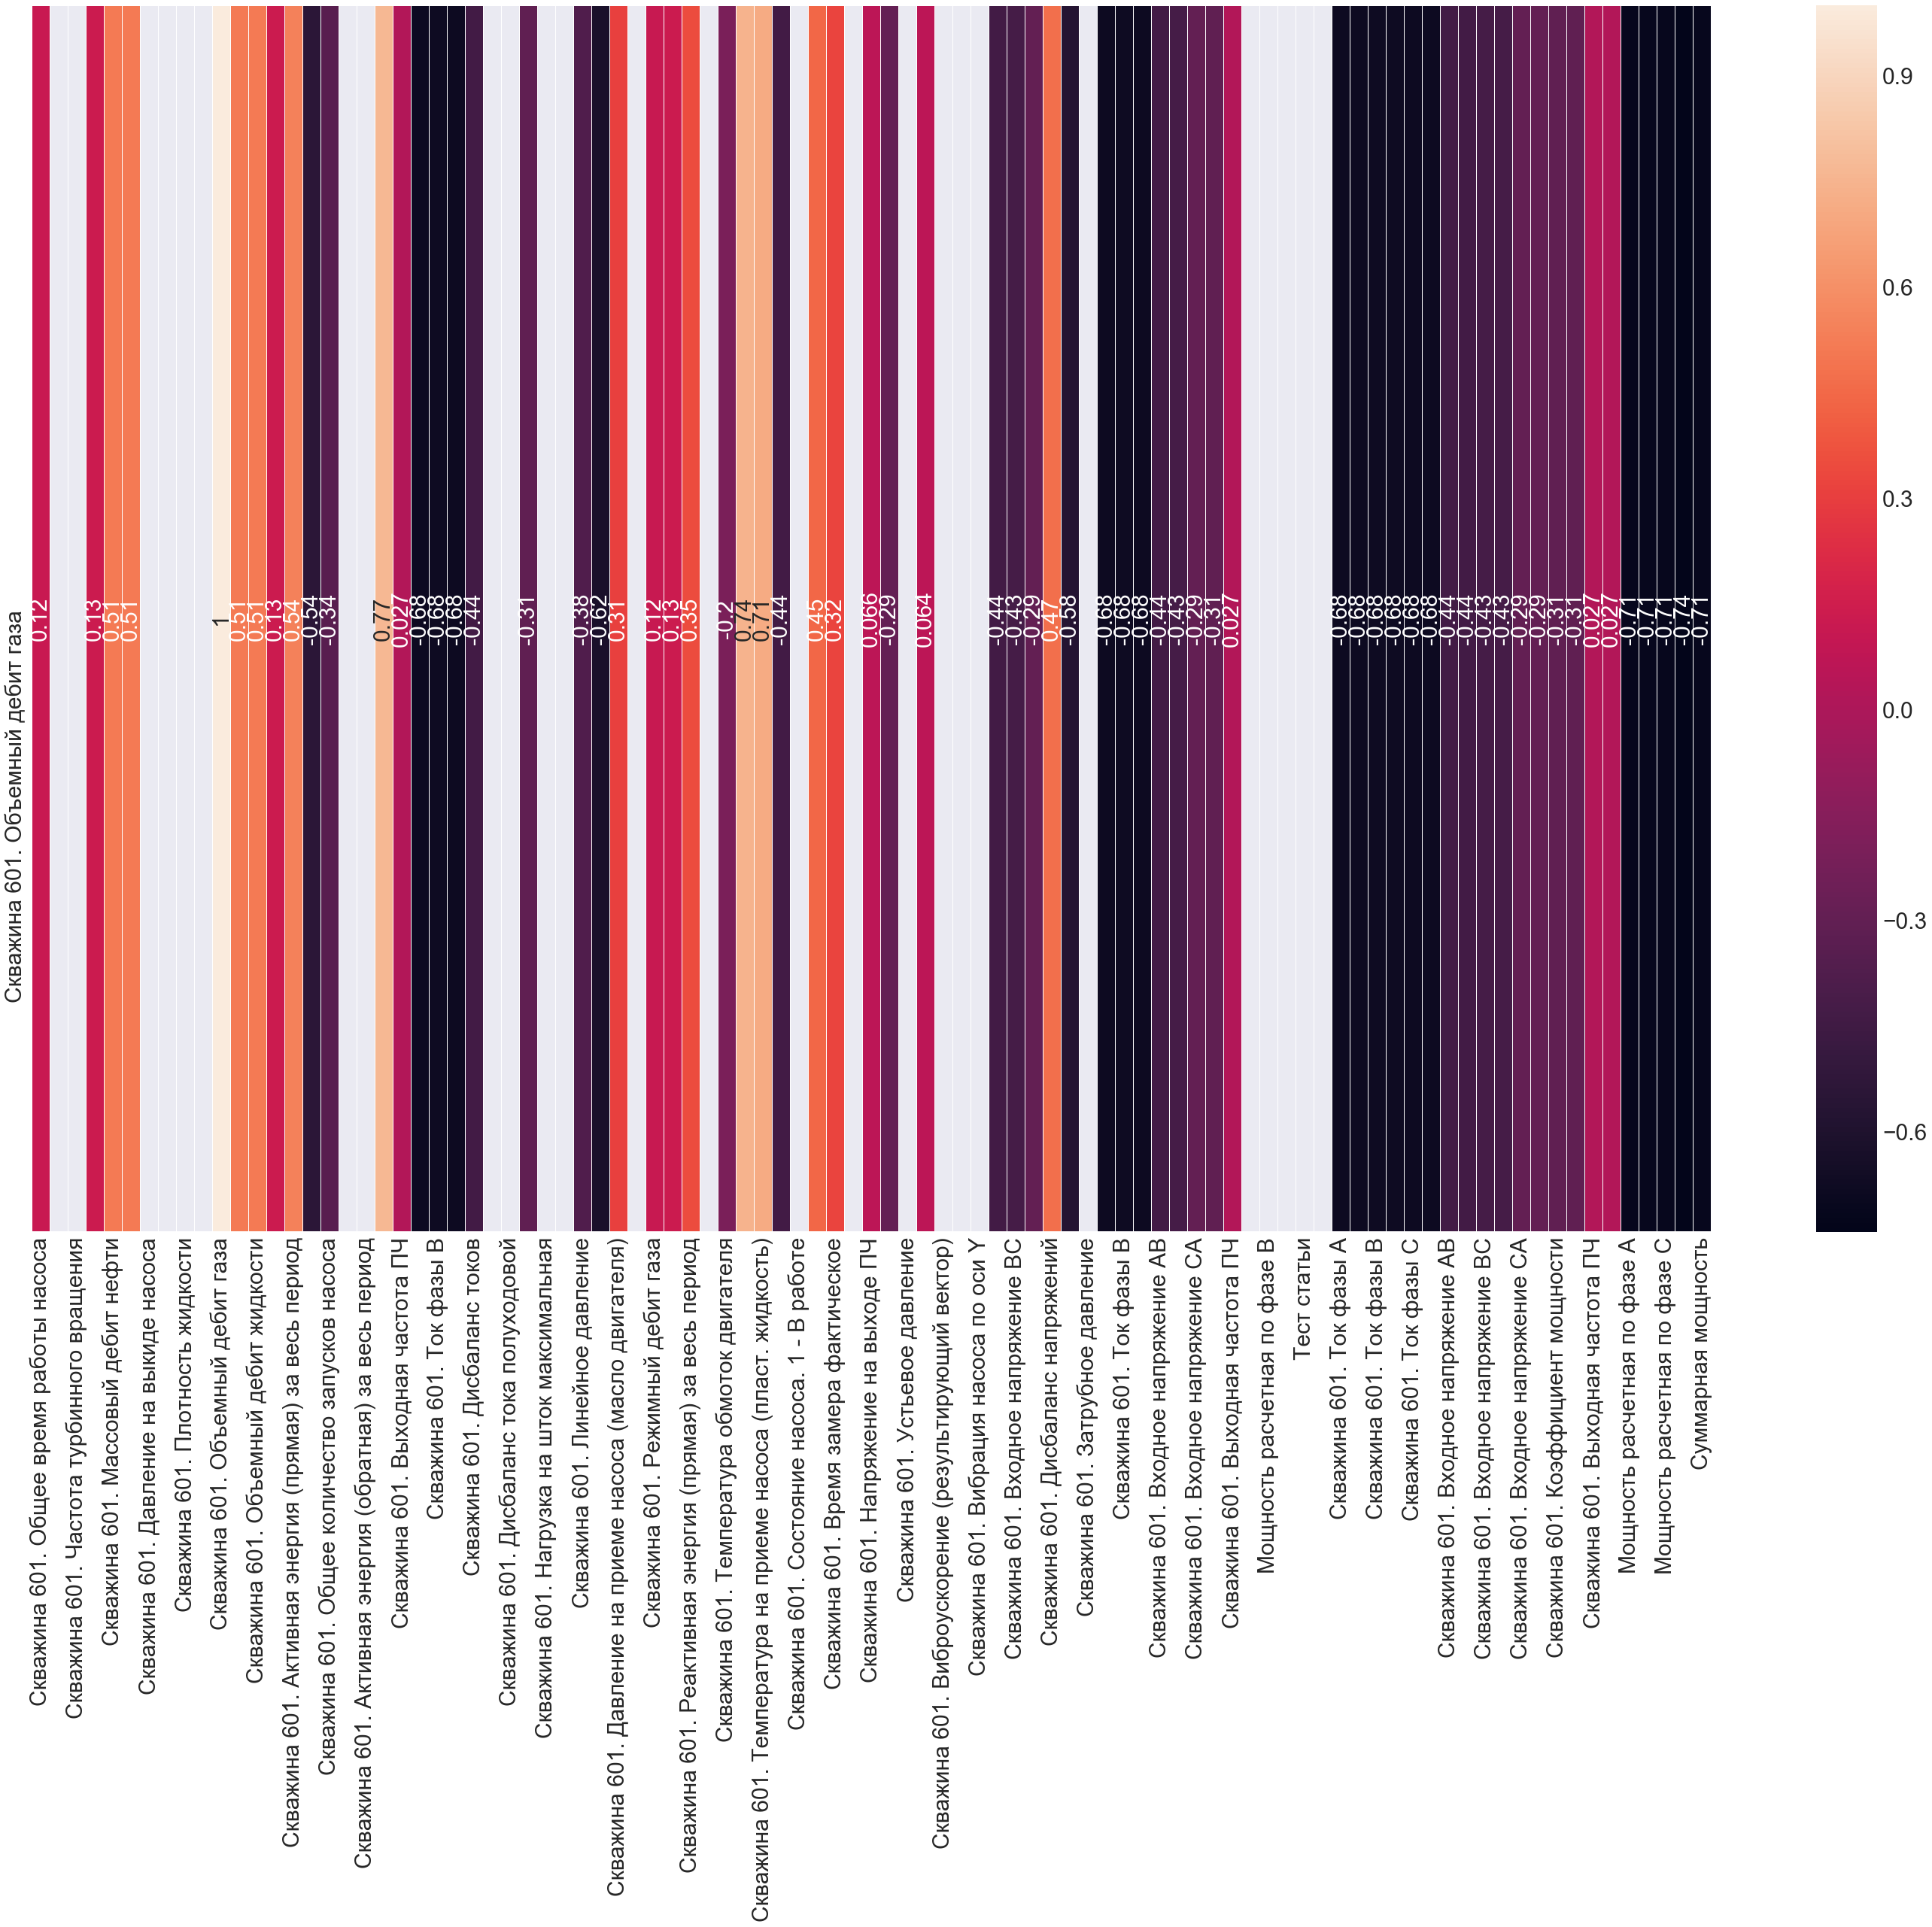

In [33]:
#data = data.groupby(data.index.to_period('D')).mean()
data = add_power_columns(data, filename)
get_correlation(data, filename)


In [54]:
f = open('F:\Work\Данные для виртуальной расходометрии\Данные Мессояха\Мессояха\Авг18-Фев19 ВЧ скв без ВЧ зам.csv')
df = pd.read_csv(f, index_col=0, sep=';', encoding='utf8')
f.close()
df = df.loc[[int(filename[:-4])]]
df = df[['Дата', 'Давление в линии (нефт)']]
df['Дата'] = pd.to_datetime(df['Дата'])
df = df.set_index(['Дата'])
df = df.groupby(pd.Grouper(level='Дата', freq='1D')).mean().dropna()
df


,Давление в линии (нефт)
Дата,
2018-01-08,25.0
2018-04-11,28.5
2018-04-12,26.5
2018-05-09,27.0
2018-05-10,26.0
2018-06-08,25.2
2018-08-11,27.0
2018-08-18,27.4
2018-08-24,26.0


d = dict()
for wells in well_params:
    d['Дата'] = data[1].values
    d[wells] = data.loc[data[0] == wells][2]


In [7]:
pd.set_option('max_rows', 1000)
data_new = pd.DataFrame.from_dict(d)
data_new['Дата'] = pd.to_datetime(data_new['Дата'])
data_new = data_new.set_index(['Дата'])
df = pd.DataFrame()
columns=['КУСТ 74. ГЗУ 74. Скважина 627. Ток фазы А', 'КУСТ 74. ГЗУ 74. Скважина 627. Ток фазы В',
         'КУСТ 74. ГЗУ 74. Скважина 627. Ток фазы С', 'КУСТ 74. ГЗУ 74. Скважина 627. Входное напряжение АВ',
         'КУСТ 74. ГЗУ 74. Скважина 627. Входное напряжение ВС', 'КУСТ 74. ГЗУ 74. Скважина 627. Входное напряжение СА',
         'КУСТ 74. ГЗУ 74. Скважина 627. Коэффициент мощности']
df = data_new[columns].groupby(data_new[columns].index.to_period('H')).mean()               
temp_power_A = np.multiply(df.iloc[:, [0]], df.iloc[:,[3]]).values
temp_power_B = np.multiply(df.iloc[:, [1]], df.iloc[:,[4]]).values
temp_power_C = np.multiply(df.iloc[:, [2]], df.iloc[:,[5]]).values
df['Мощность расчетная по фазе А'] = np.multiply(temp_power_A, df.iloc[:, [6]])/1000
df['Мощность расчетная по фазе В'] = np.multiply(temp_power_B, df.iloc[:, [6]])/1000
df['Мощность расчетная по фазе С'] = np.multiply(temp_power_C, df.iloc[:, [6]])/1000
df['Суммарная мощность'] = df['Мощность расчетная по фазе А'] + df['Мощность расчетная по фазе В'] + df['Мощность расчетная по фазе С']
df.index = df.index.to_timestamp()            

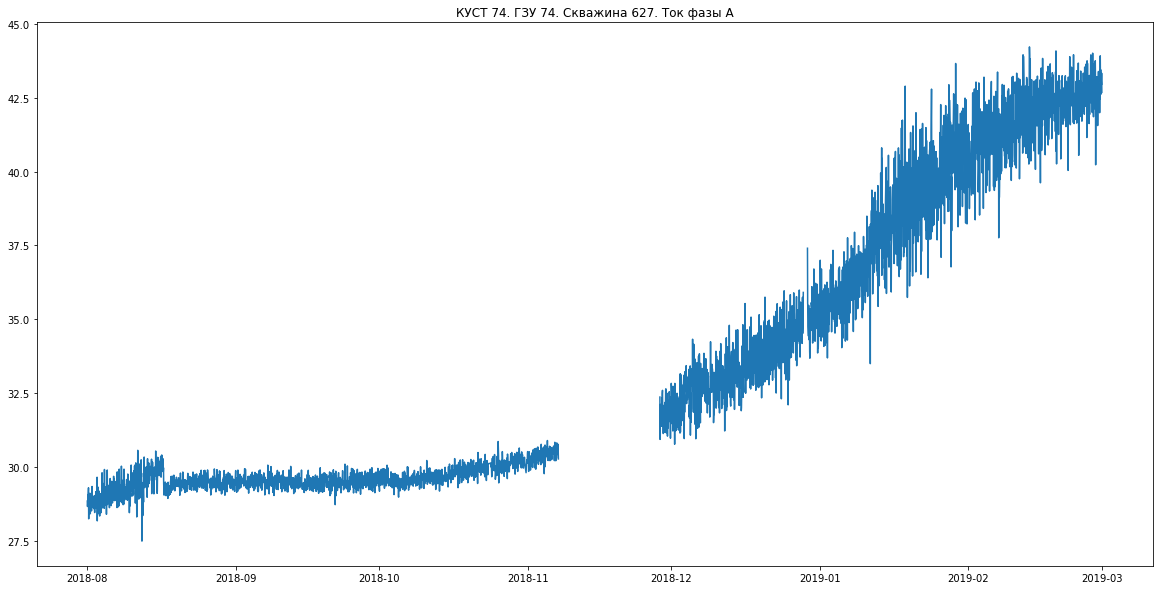

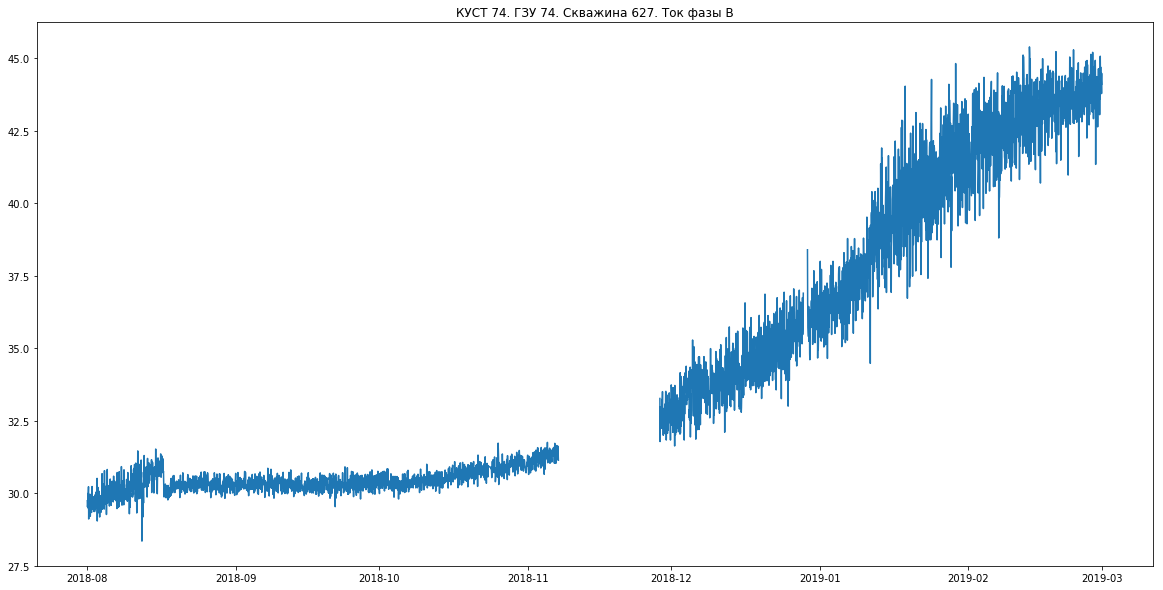

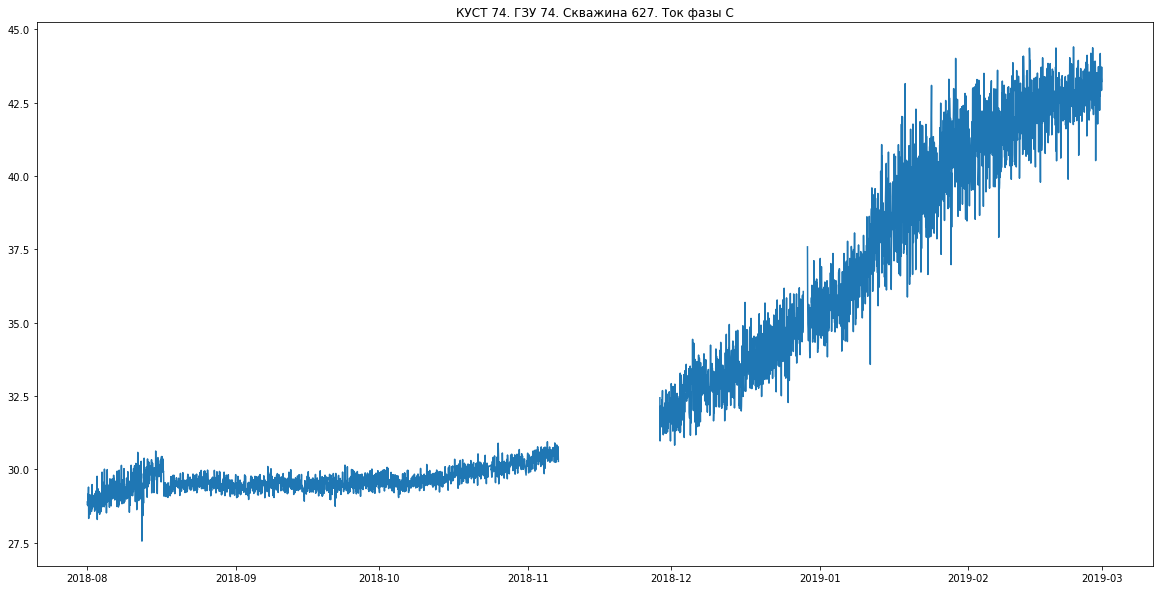

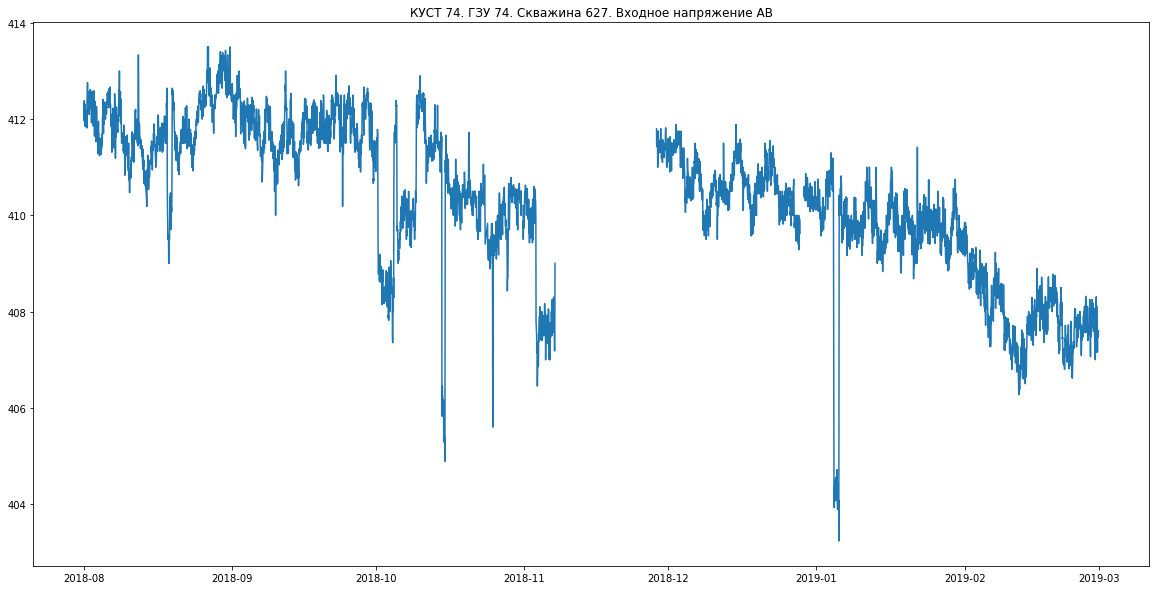

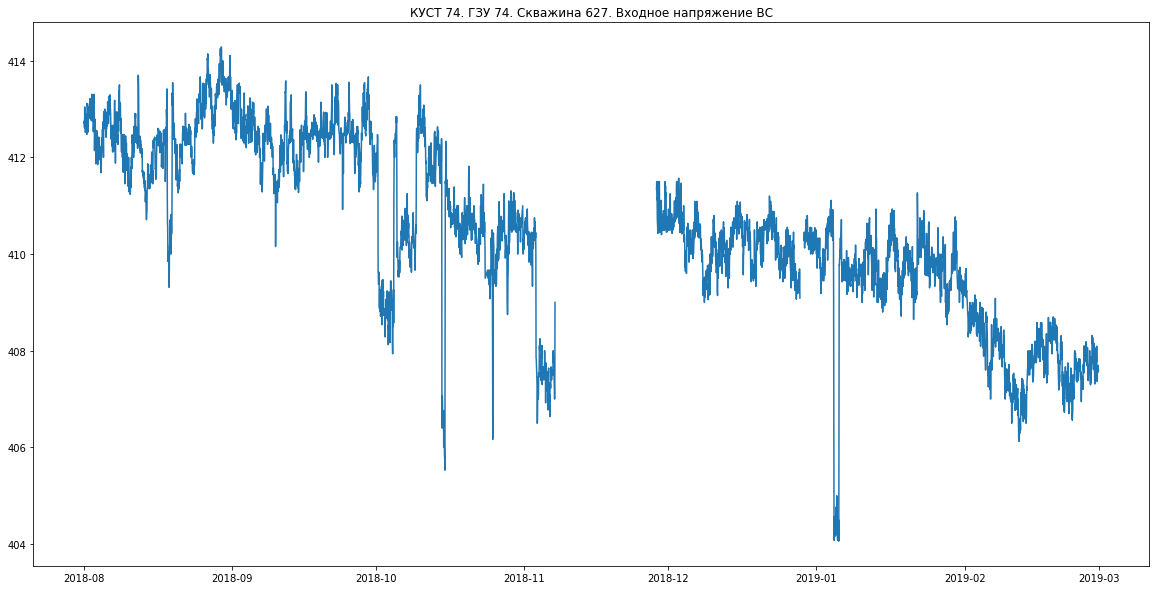

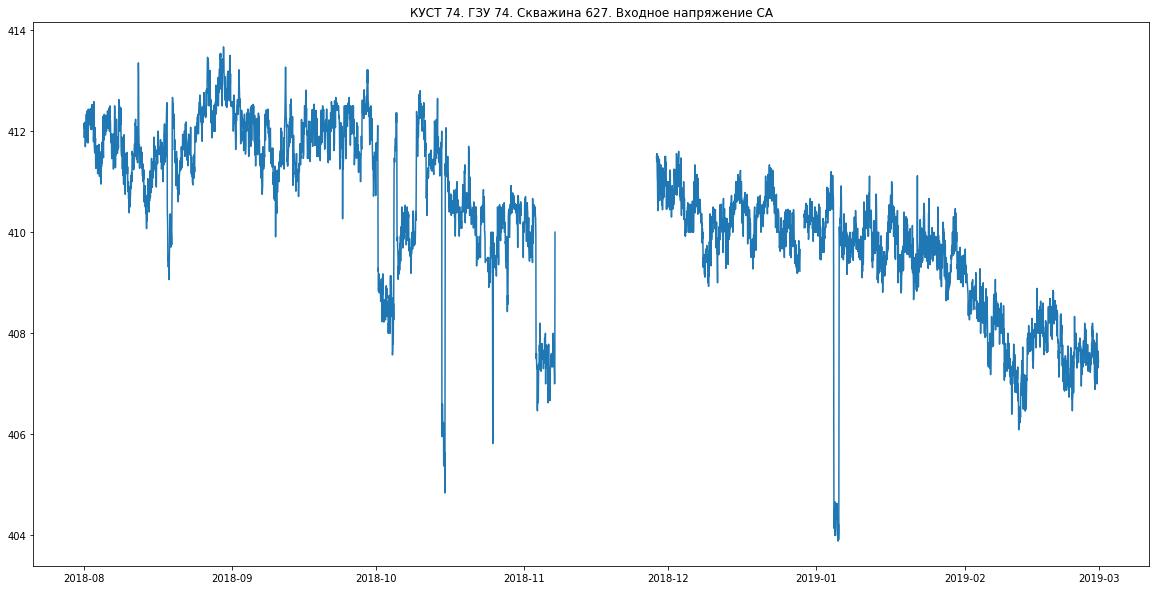

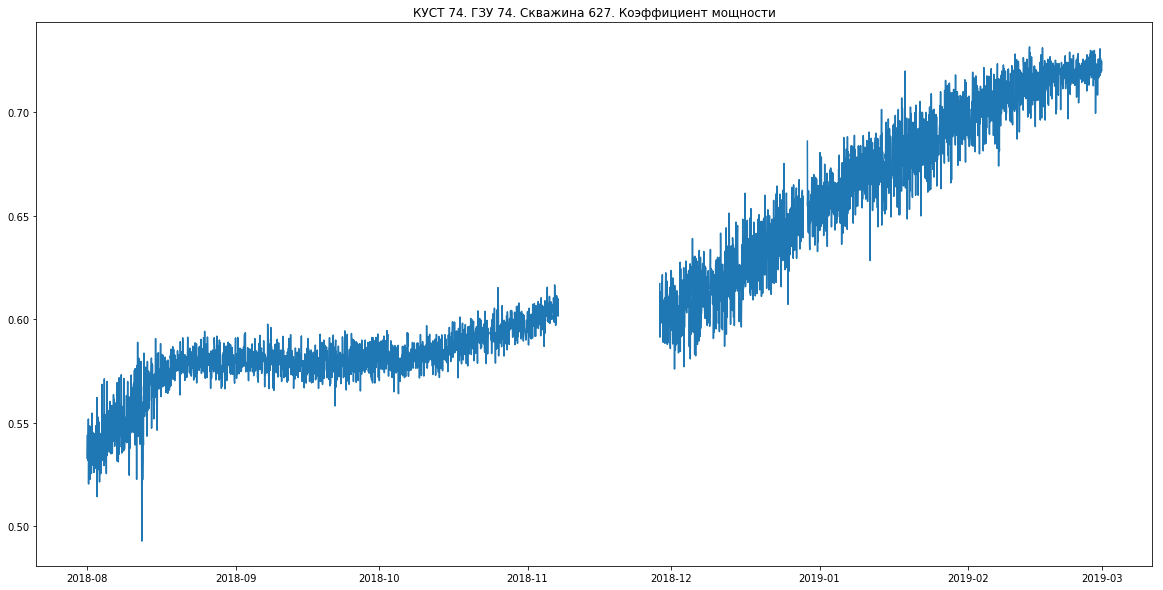

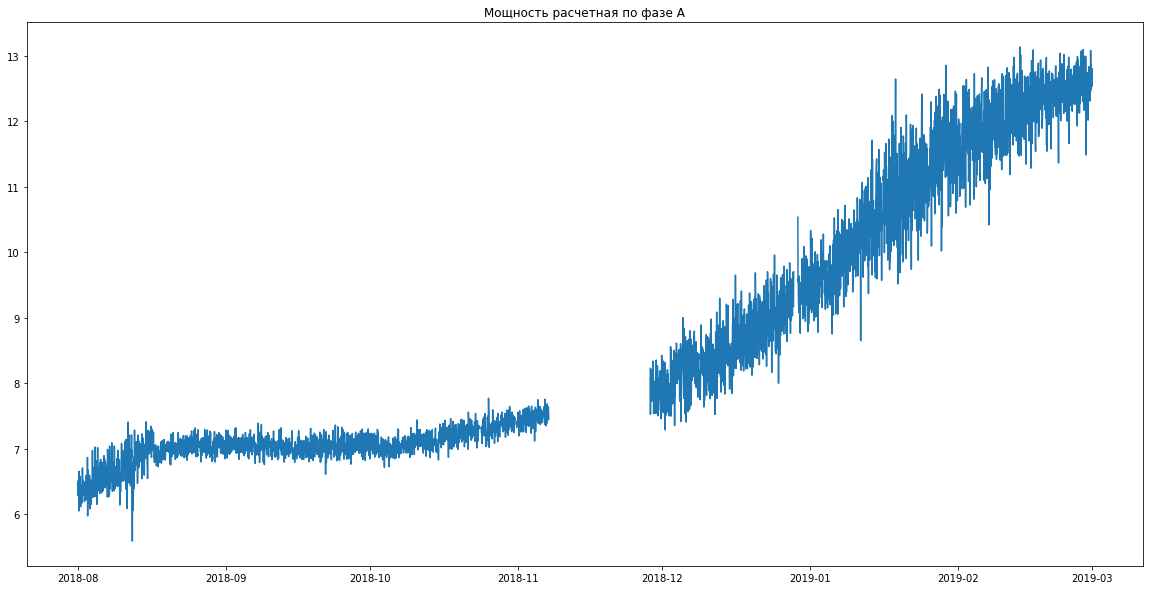

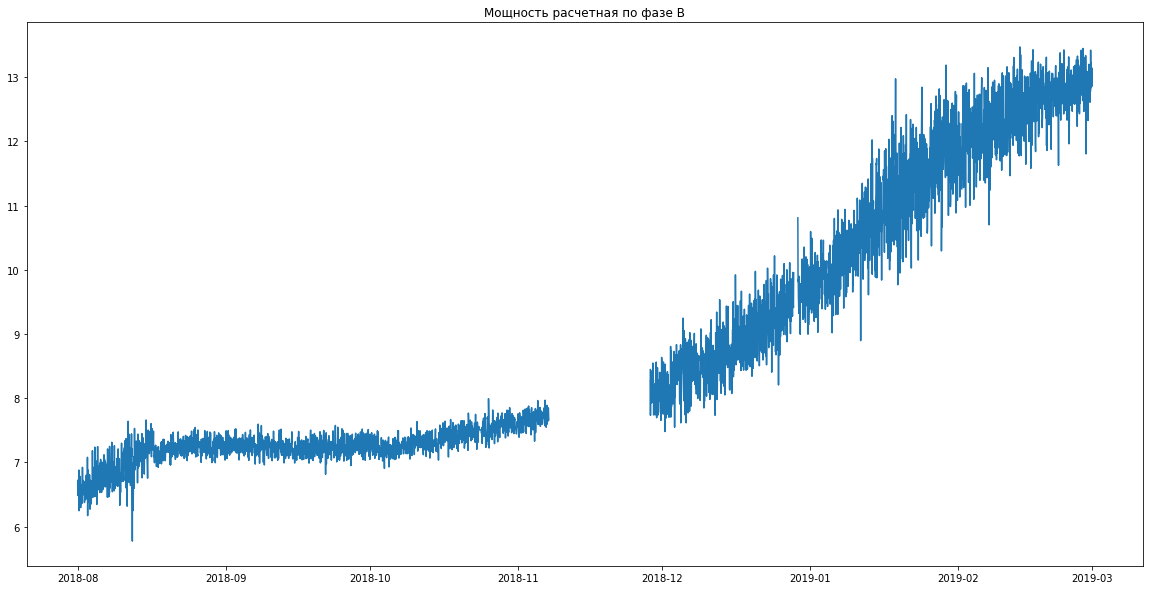

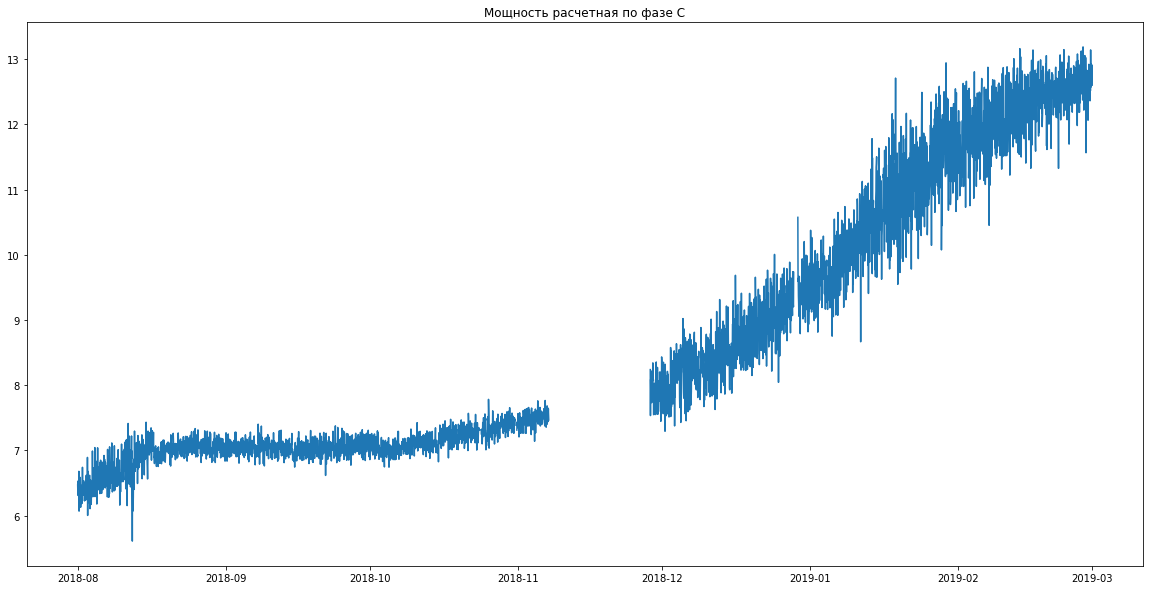

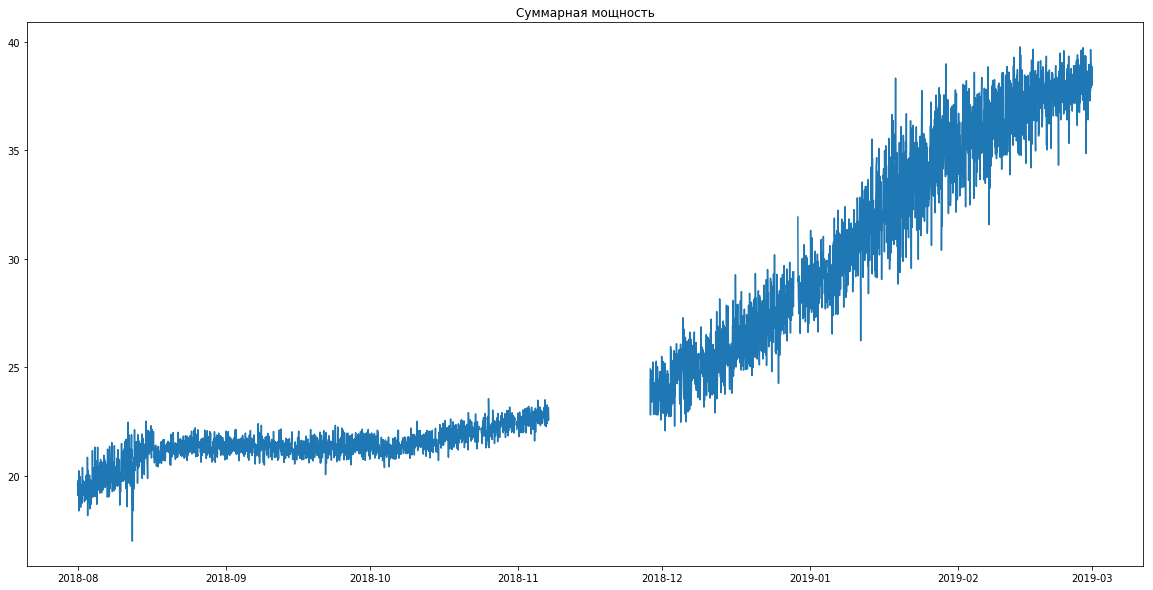

In [8]:
for param in df.columns:
    plotting(df[param], param)

F:\Anaconda\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


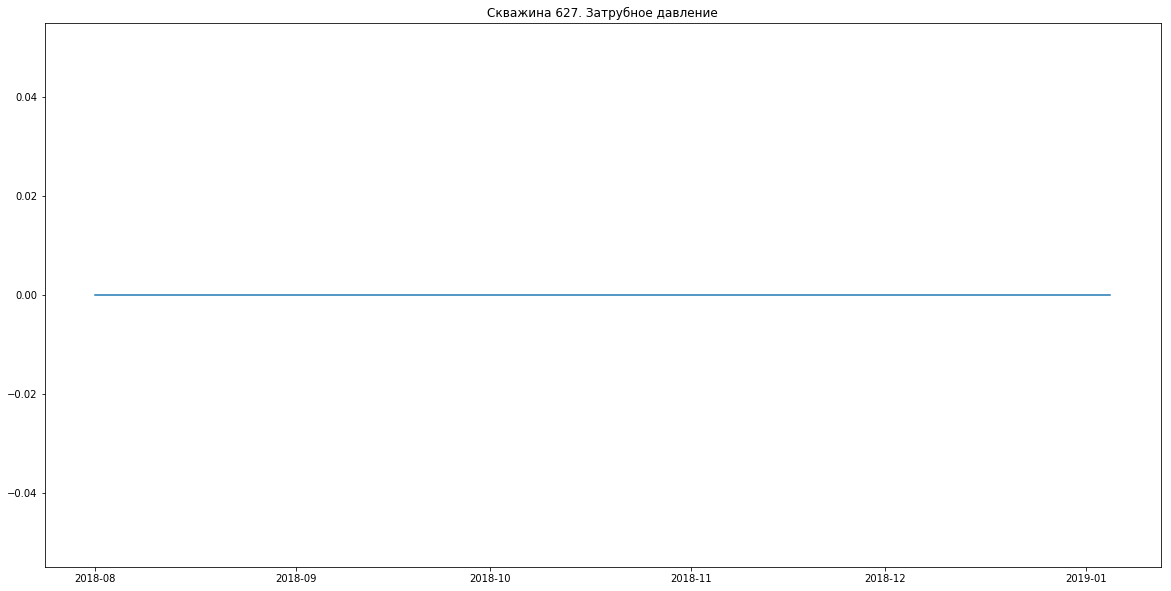

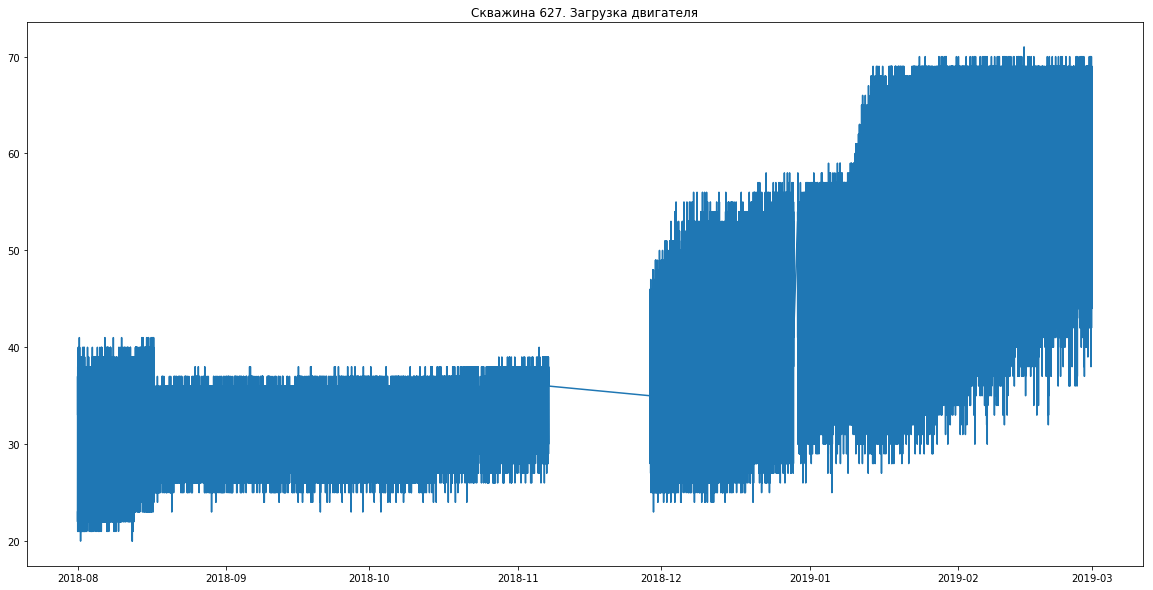

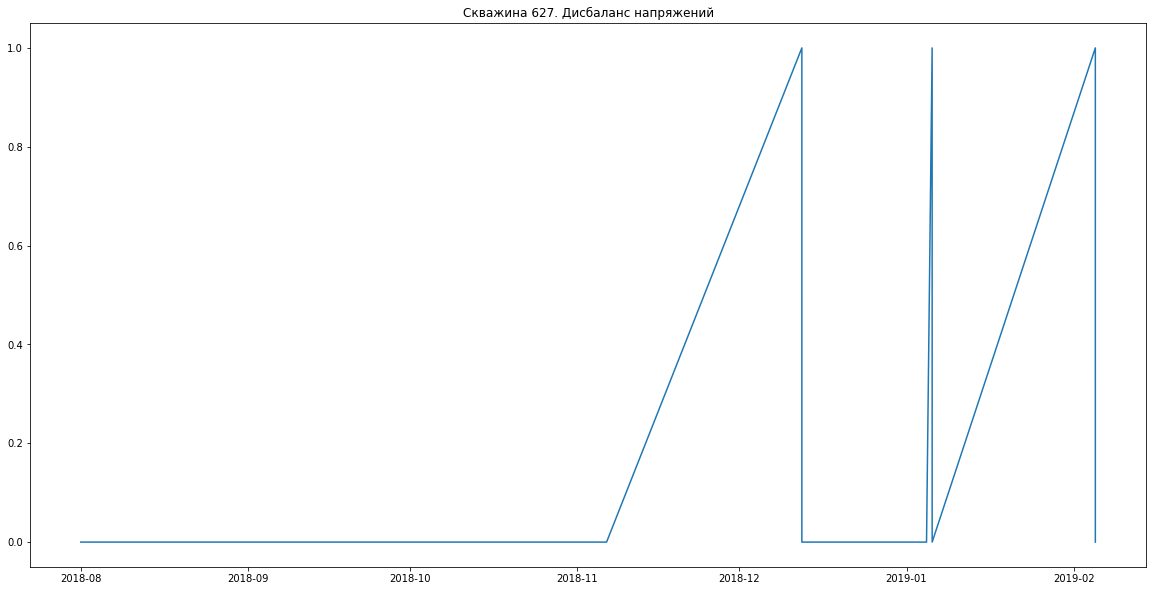

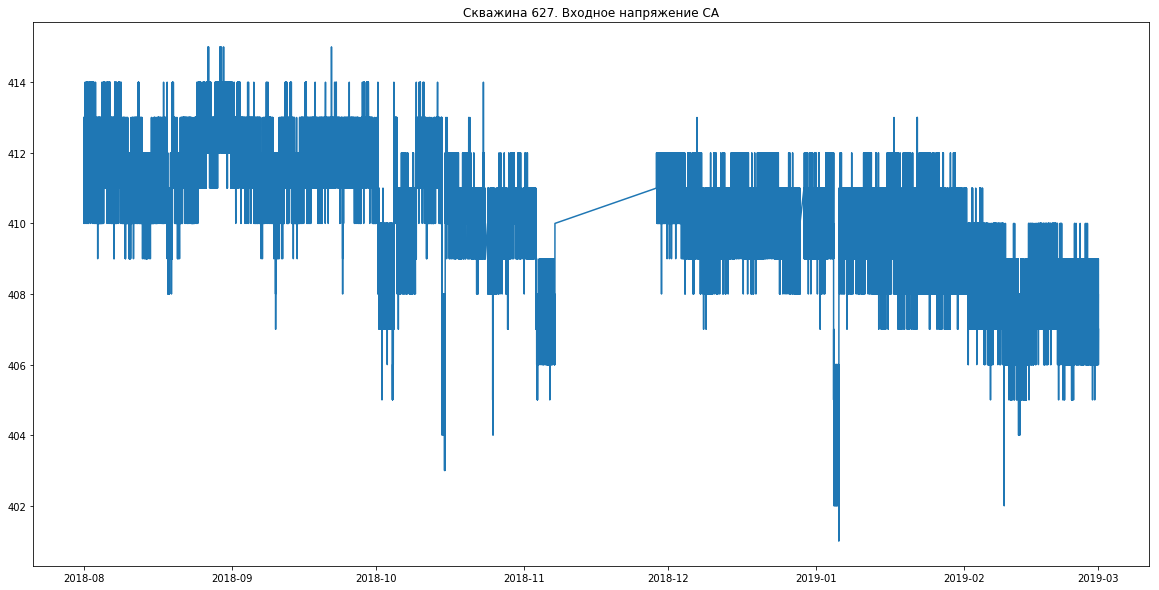

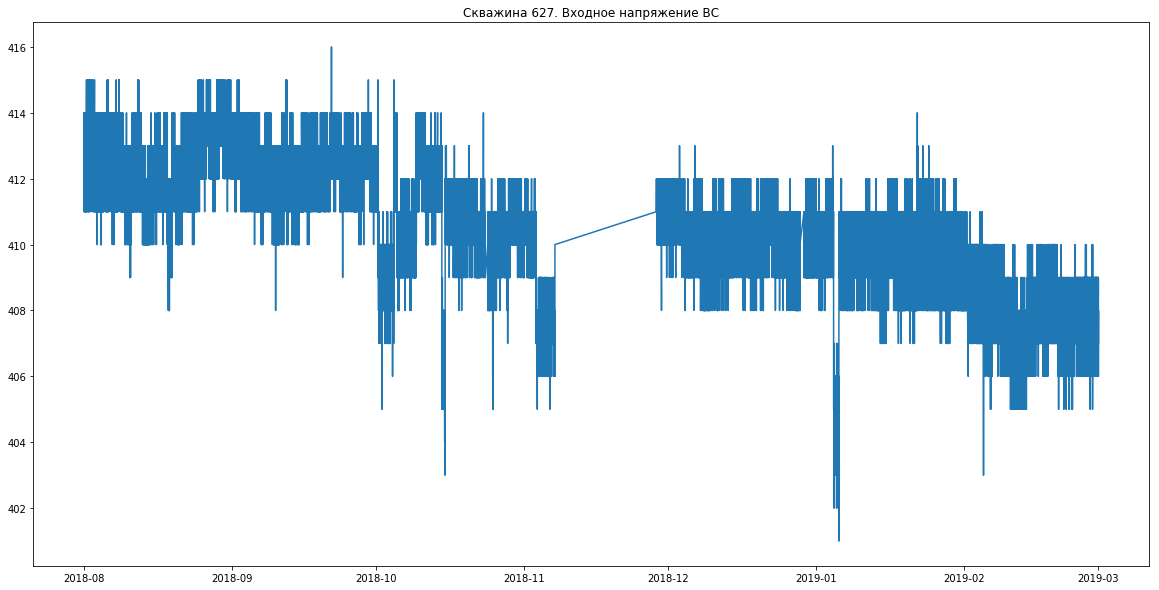

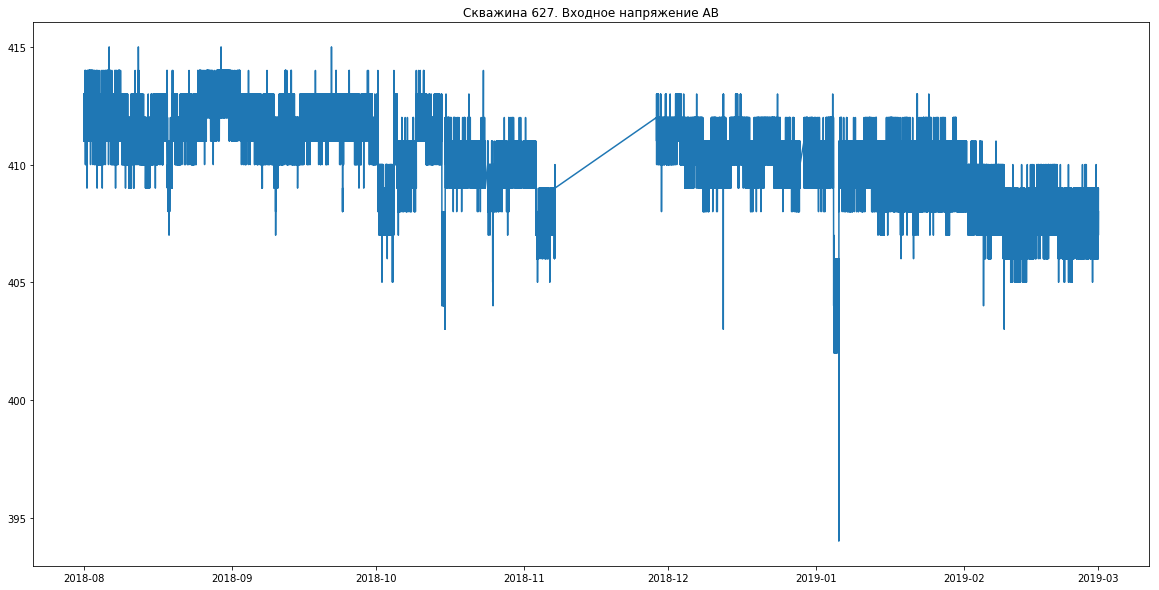

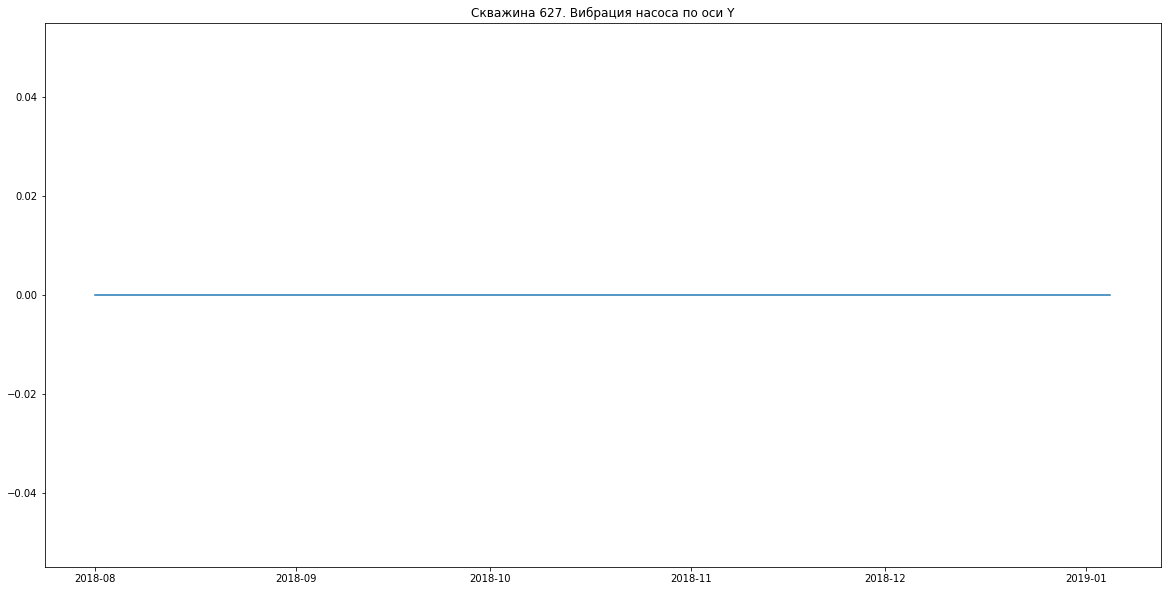

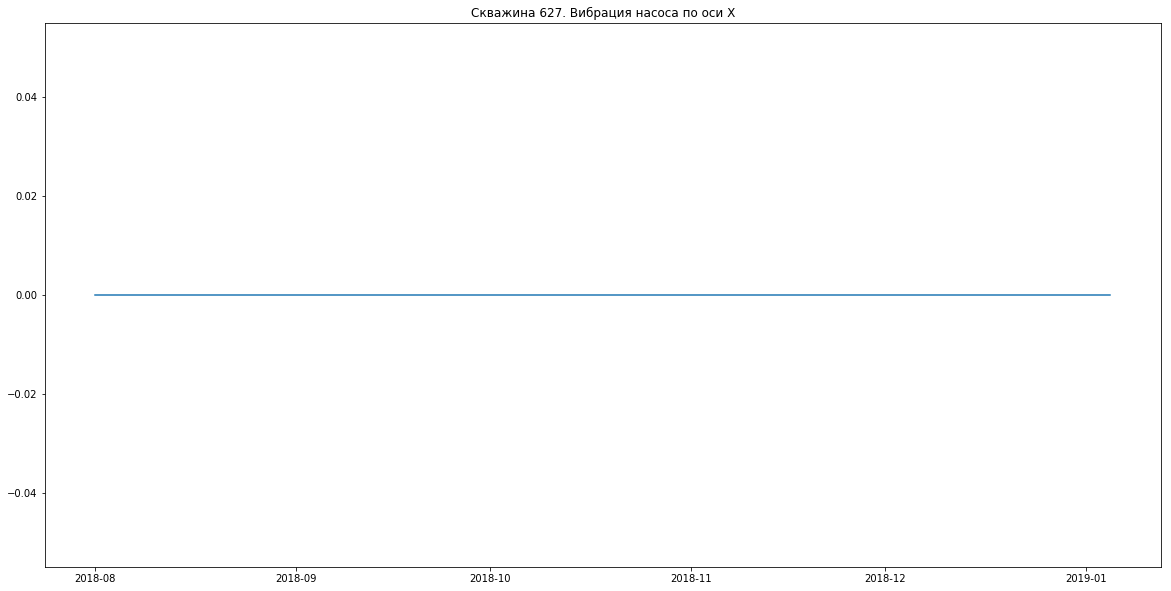

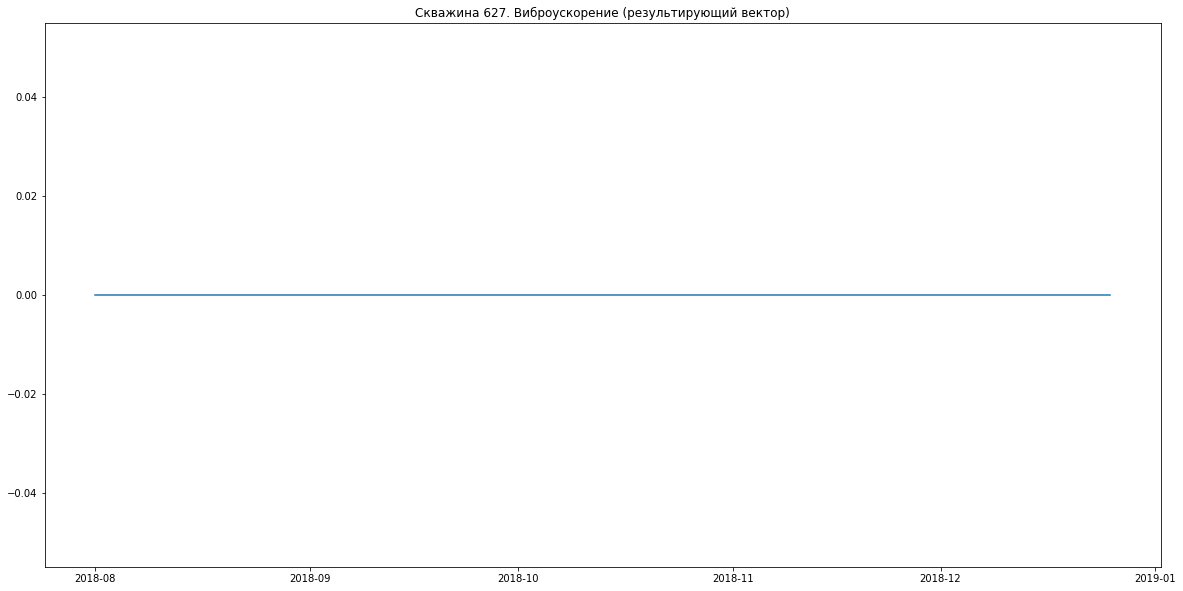

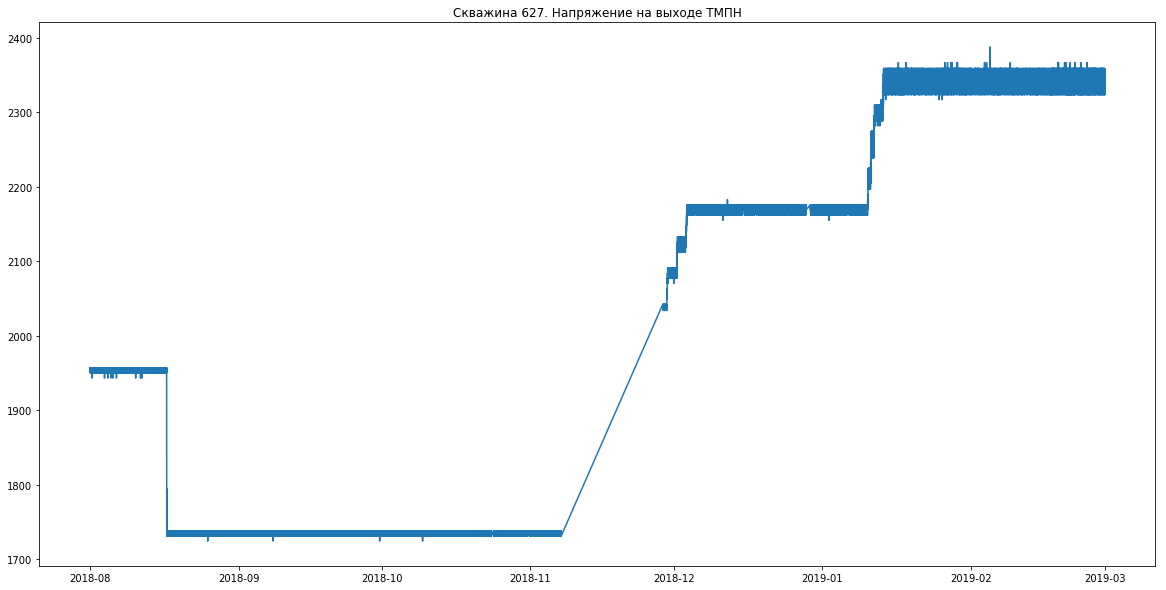

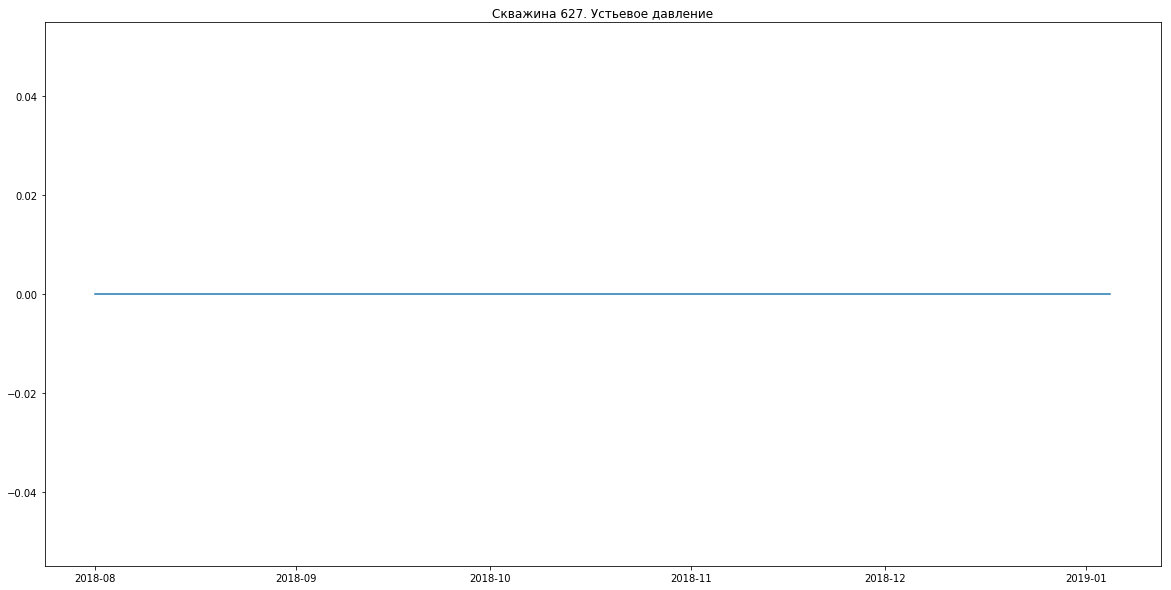

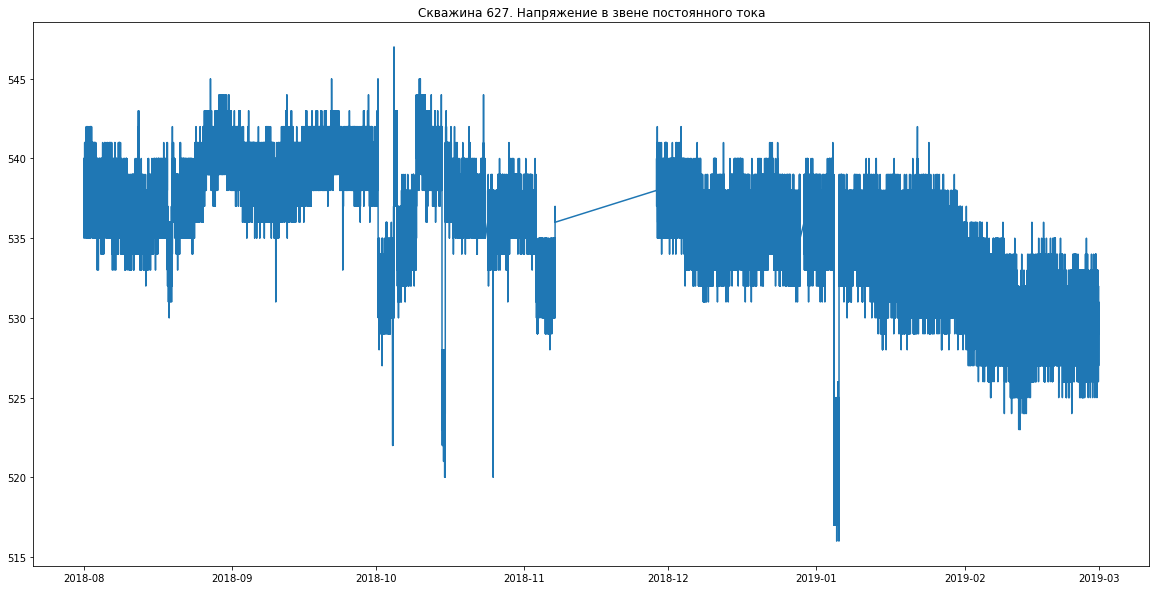

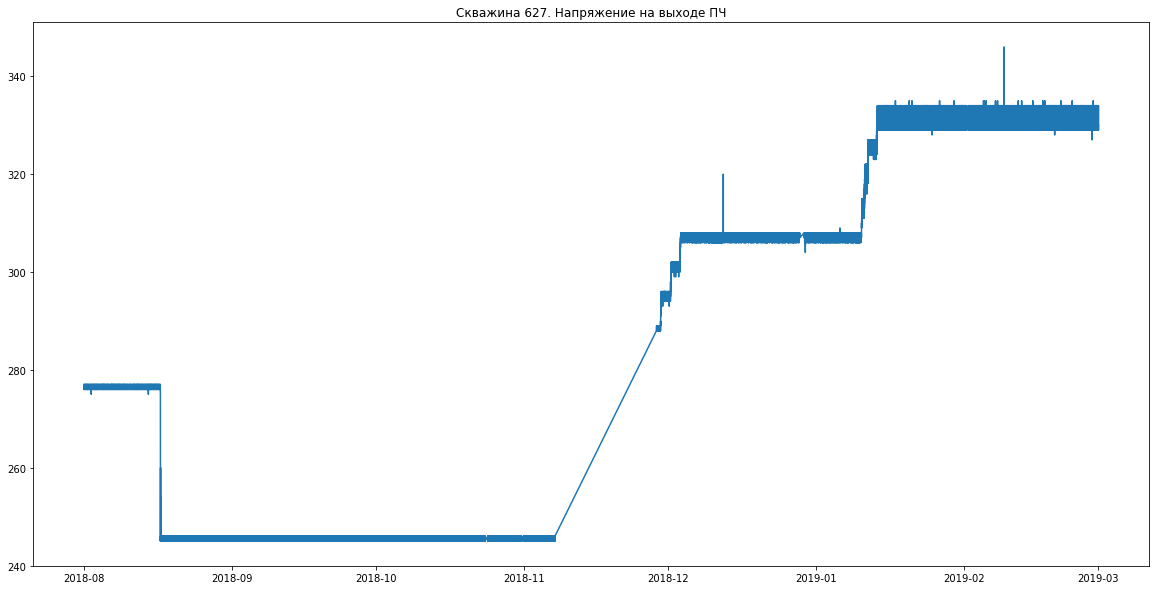

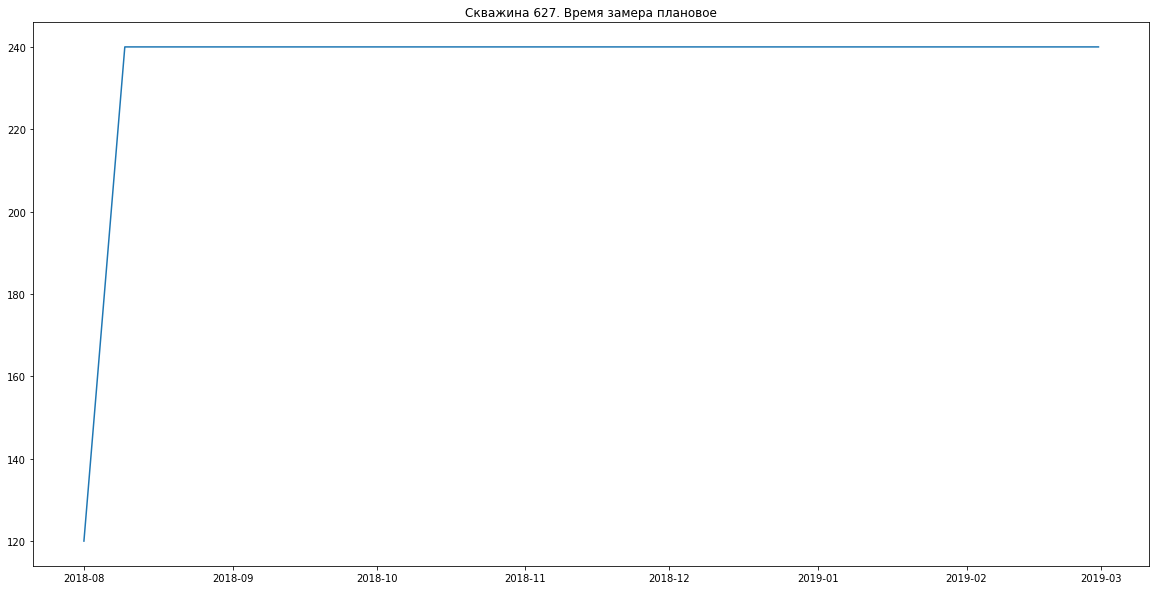

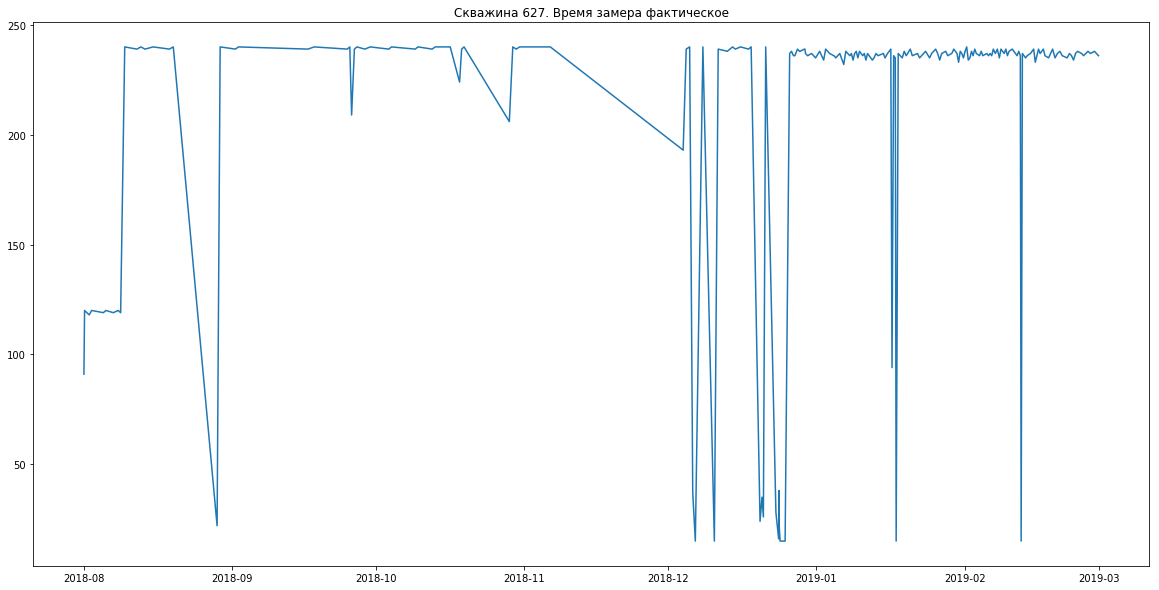

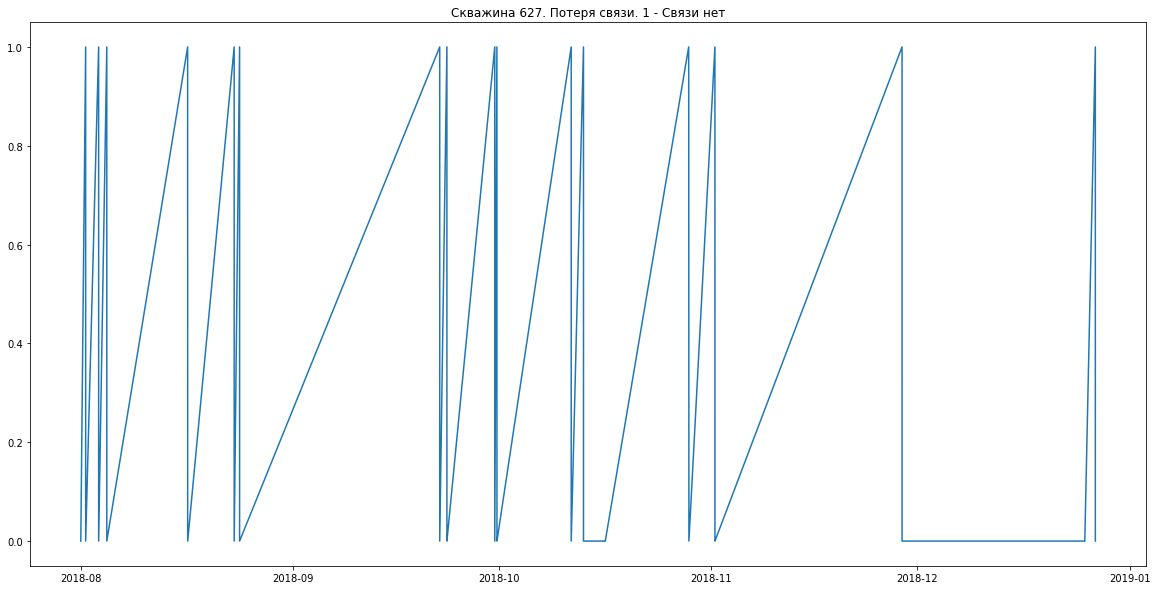

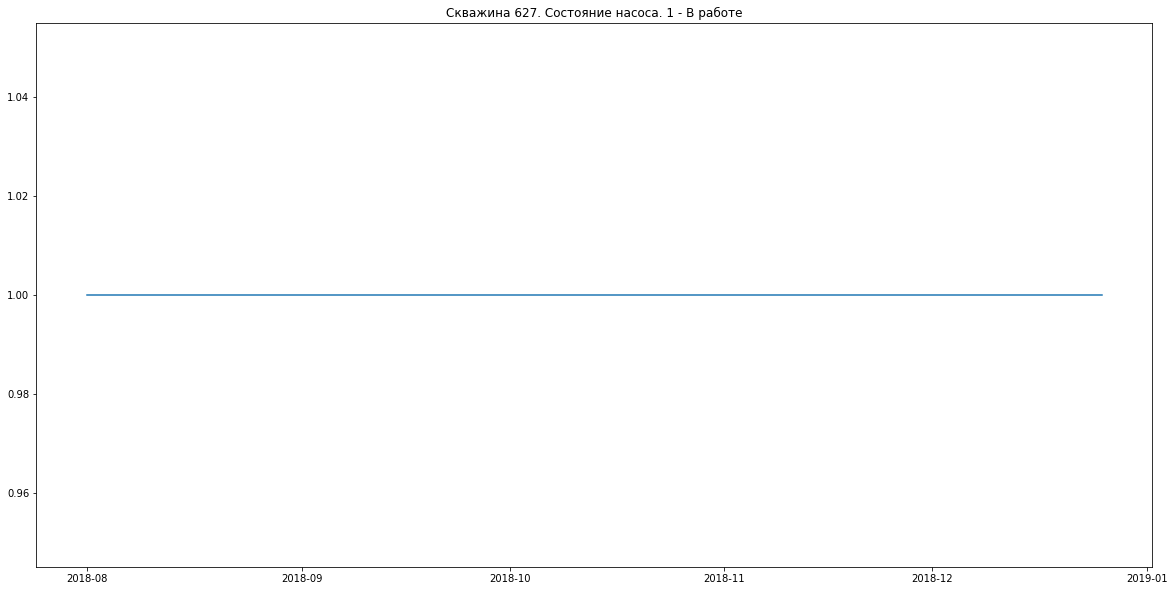

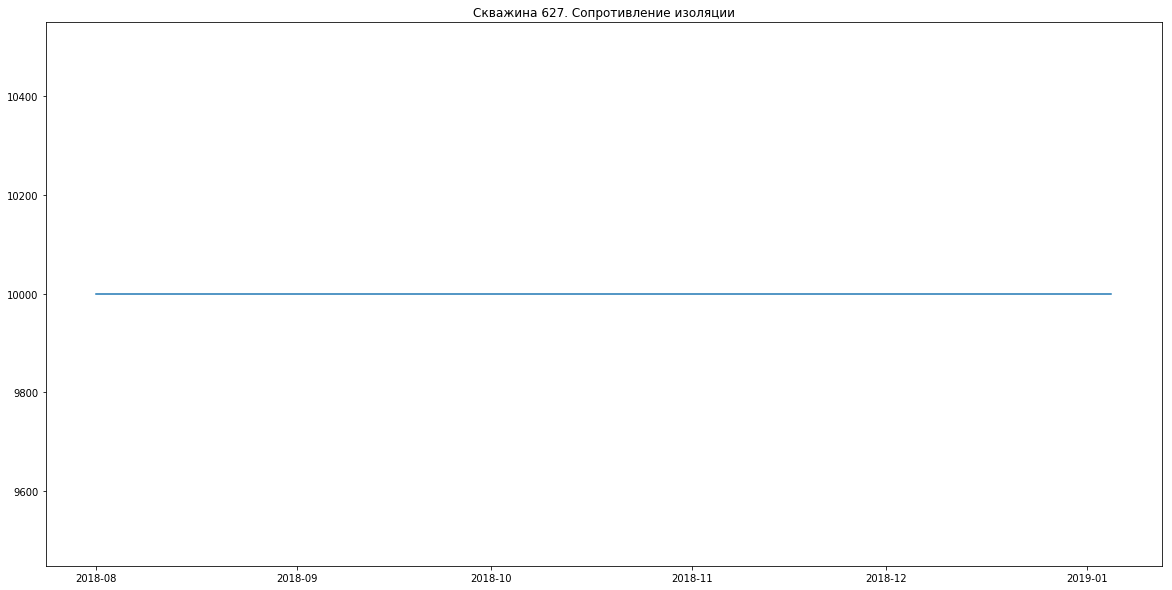

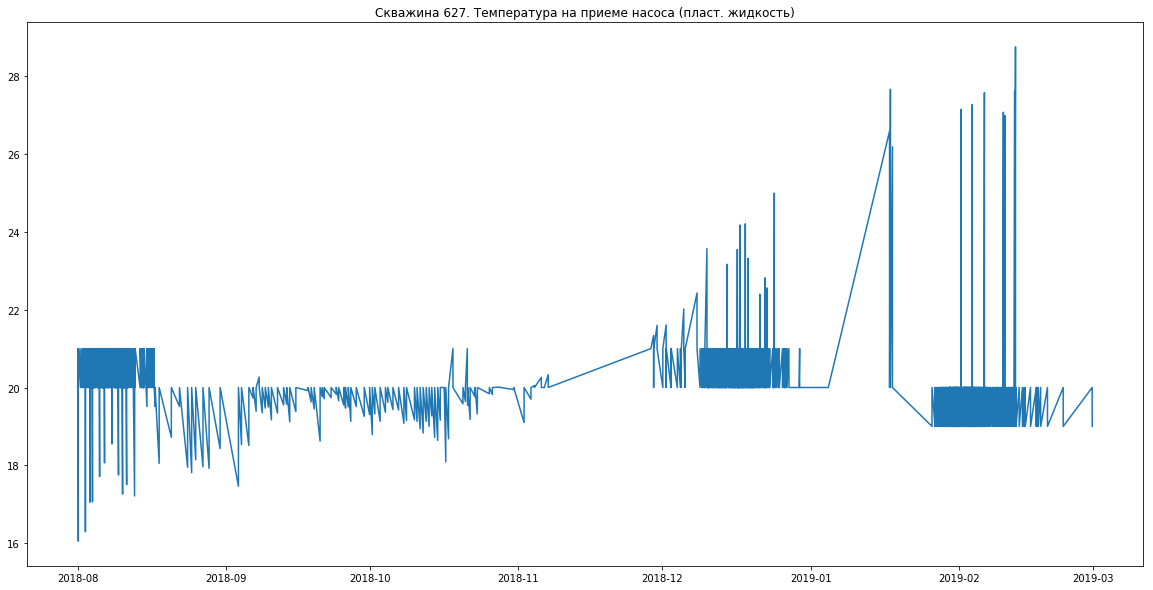

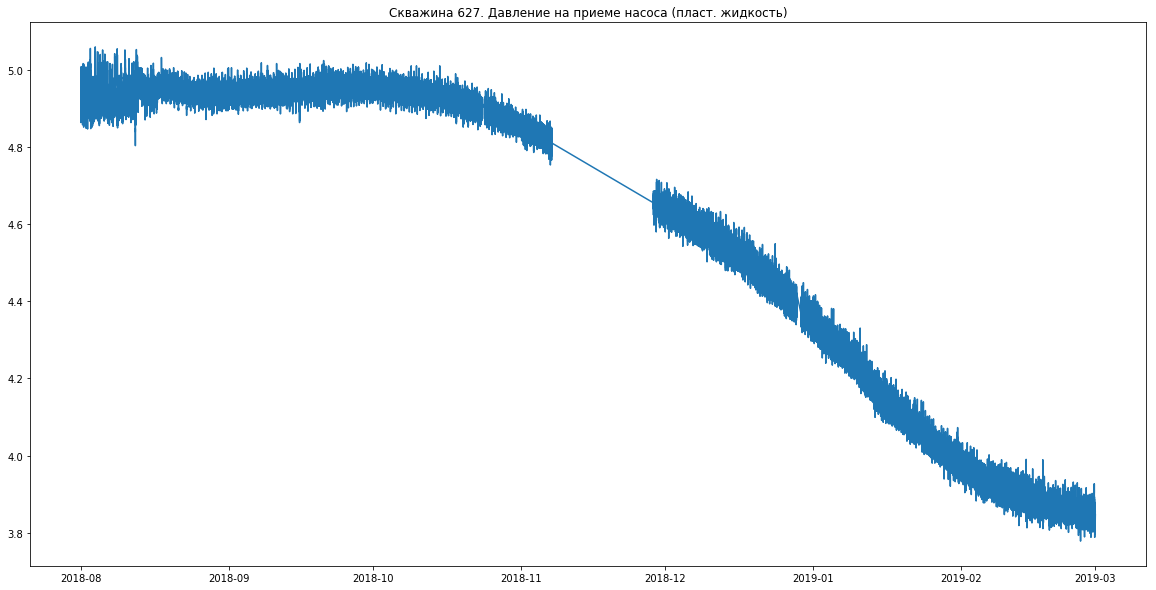

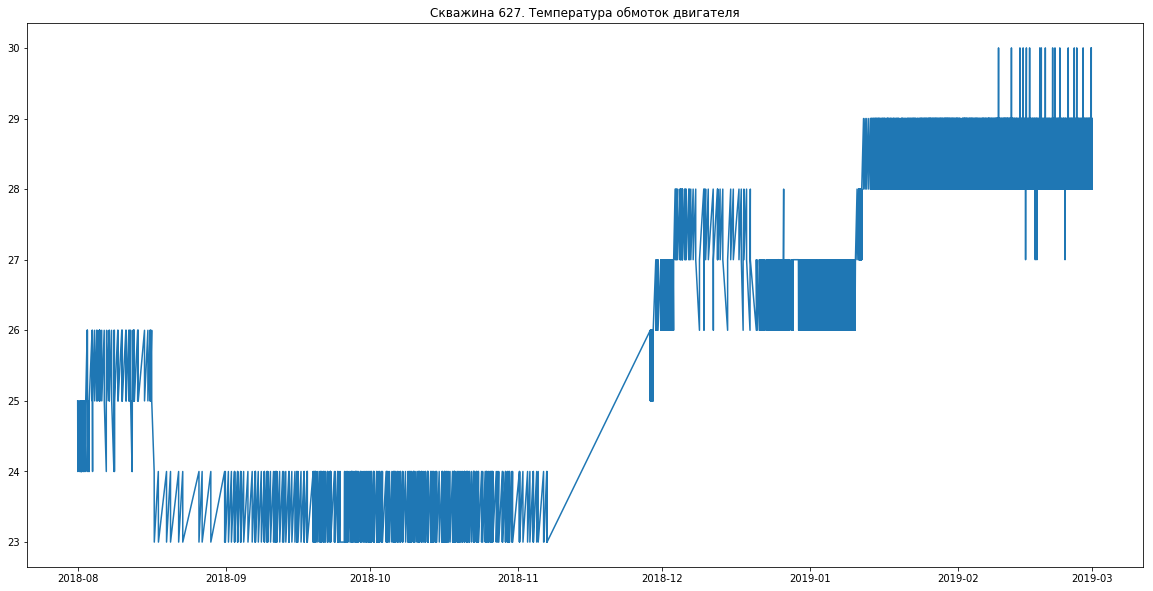

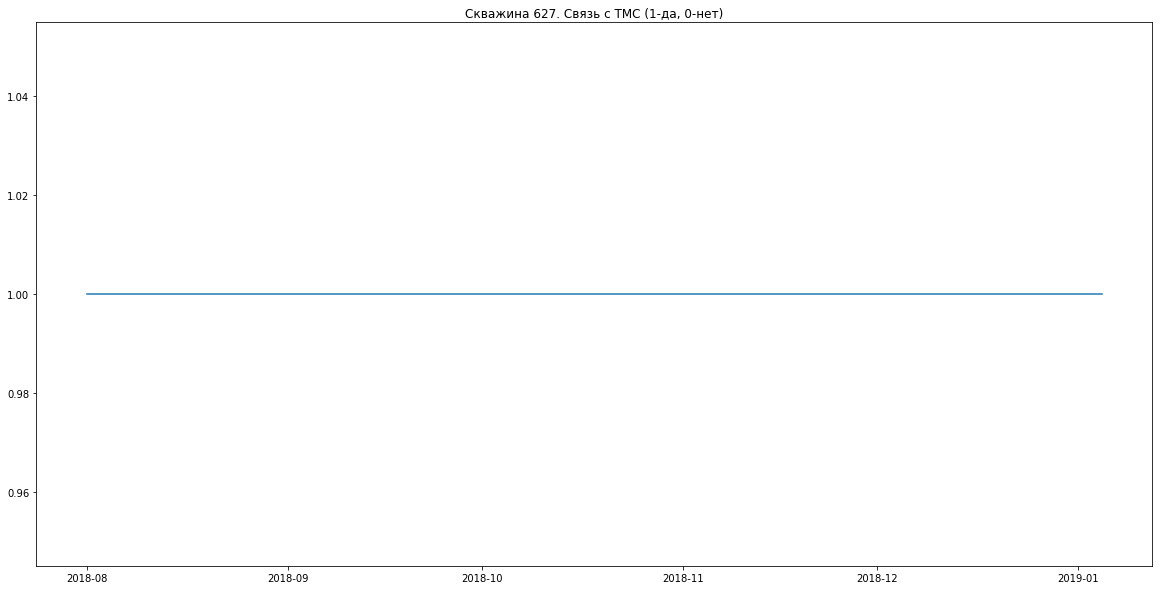

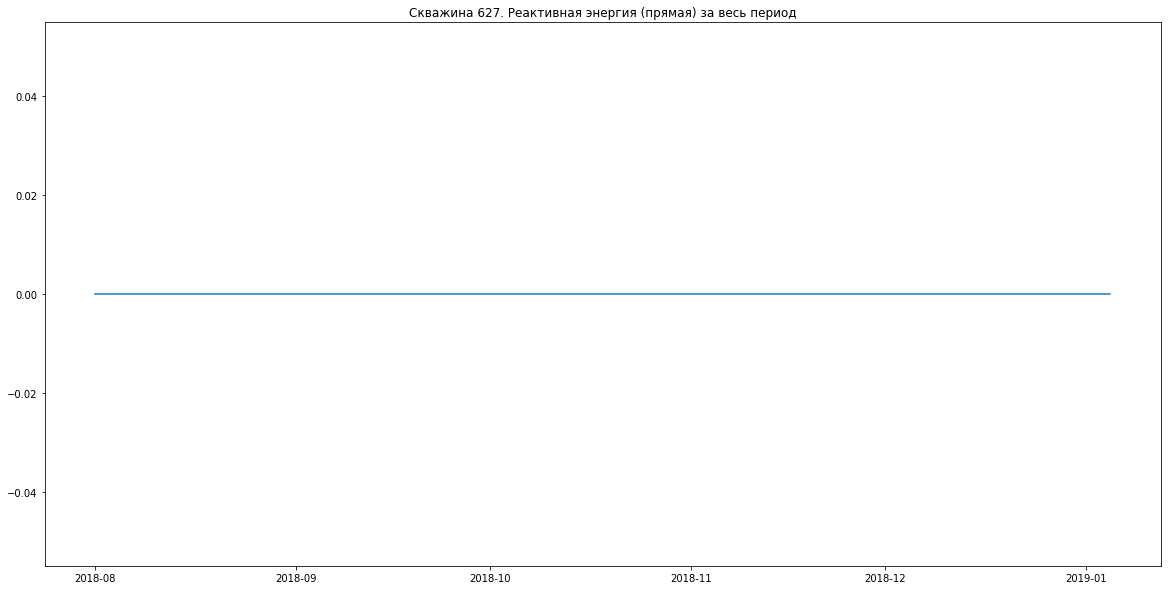

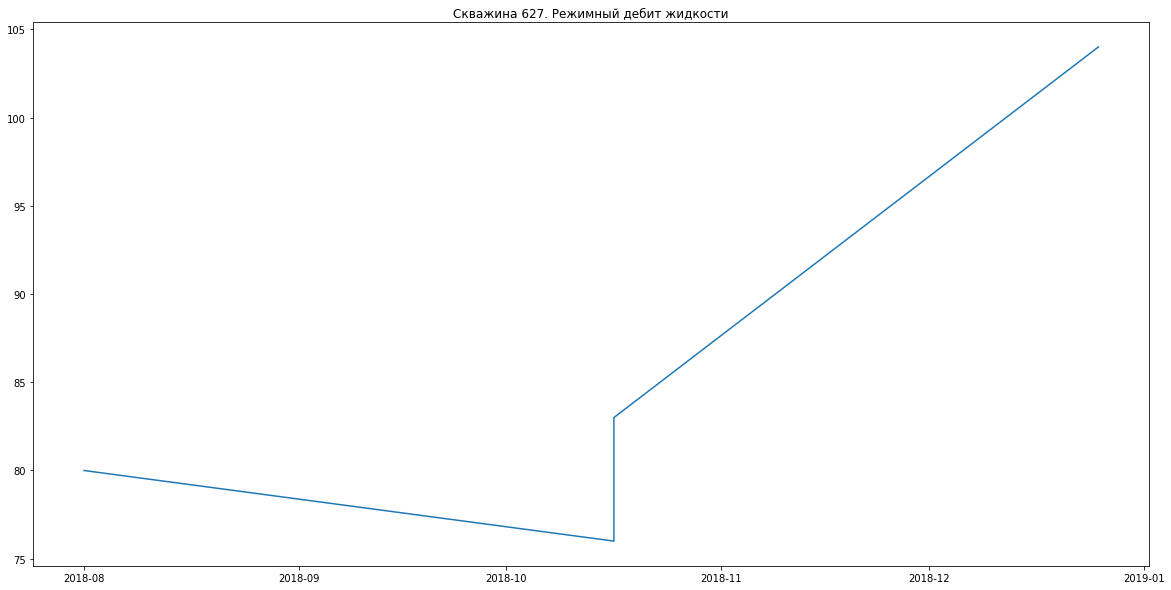

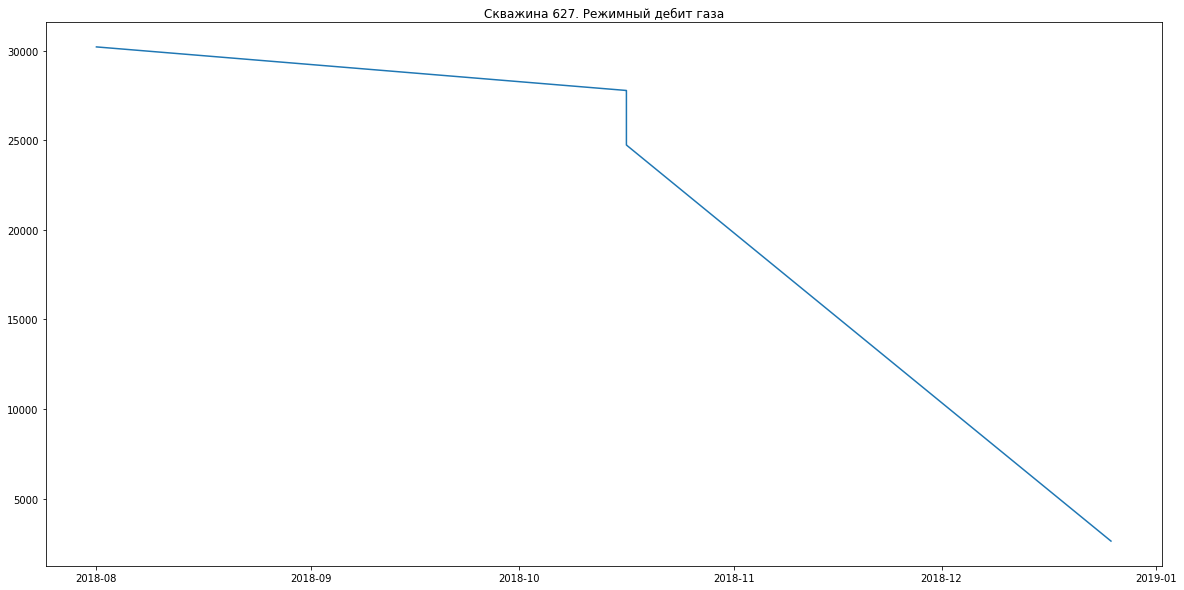

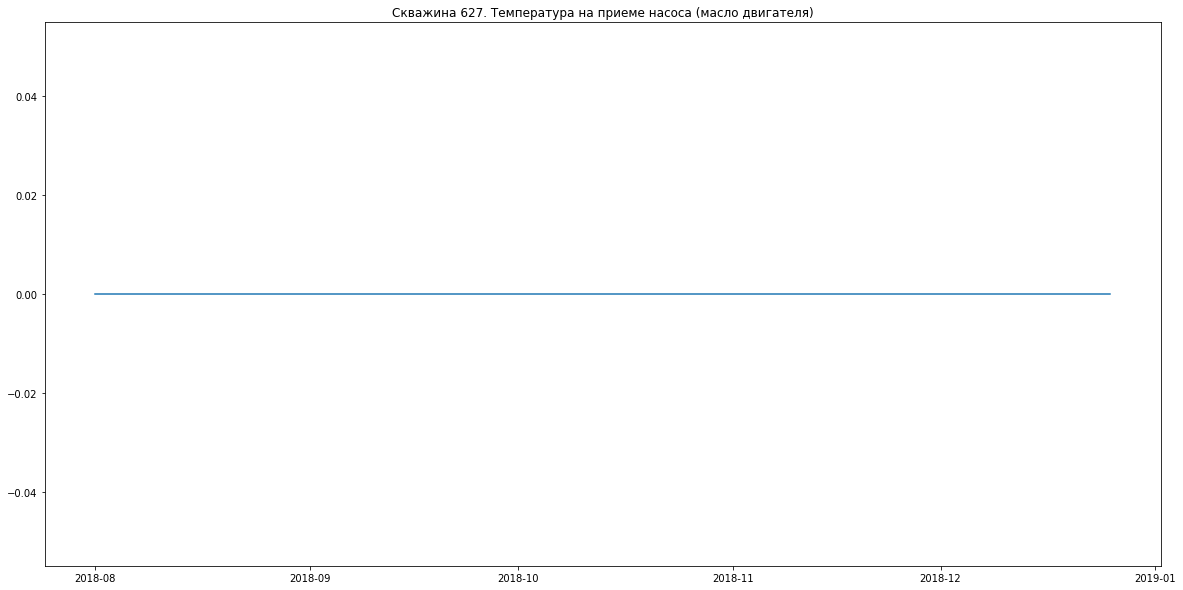

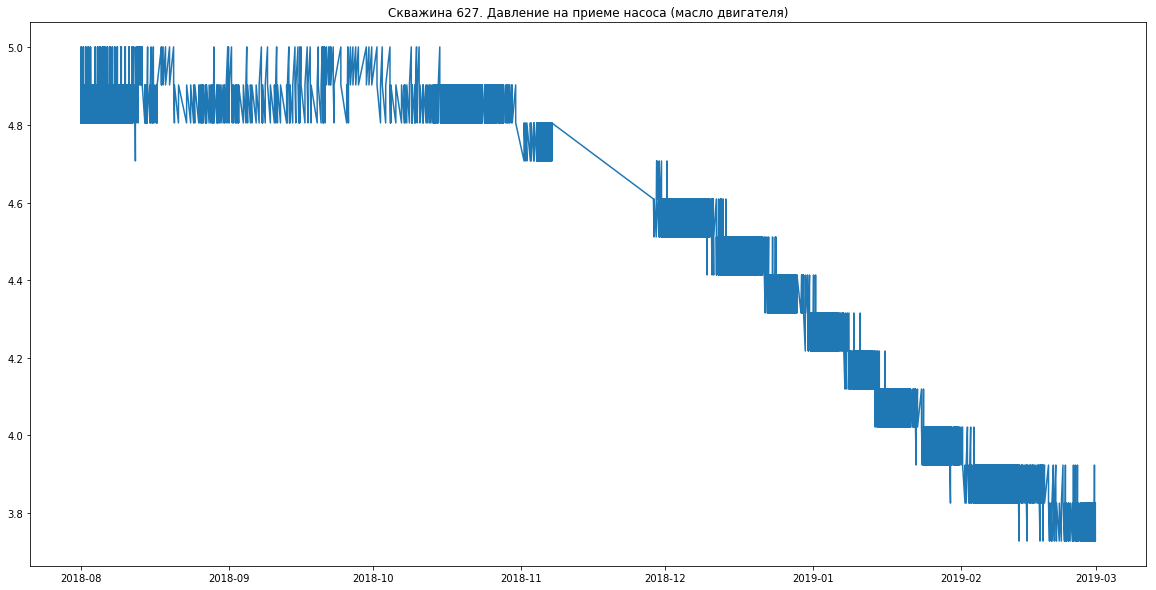

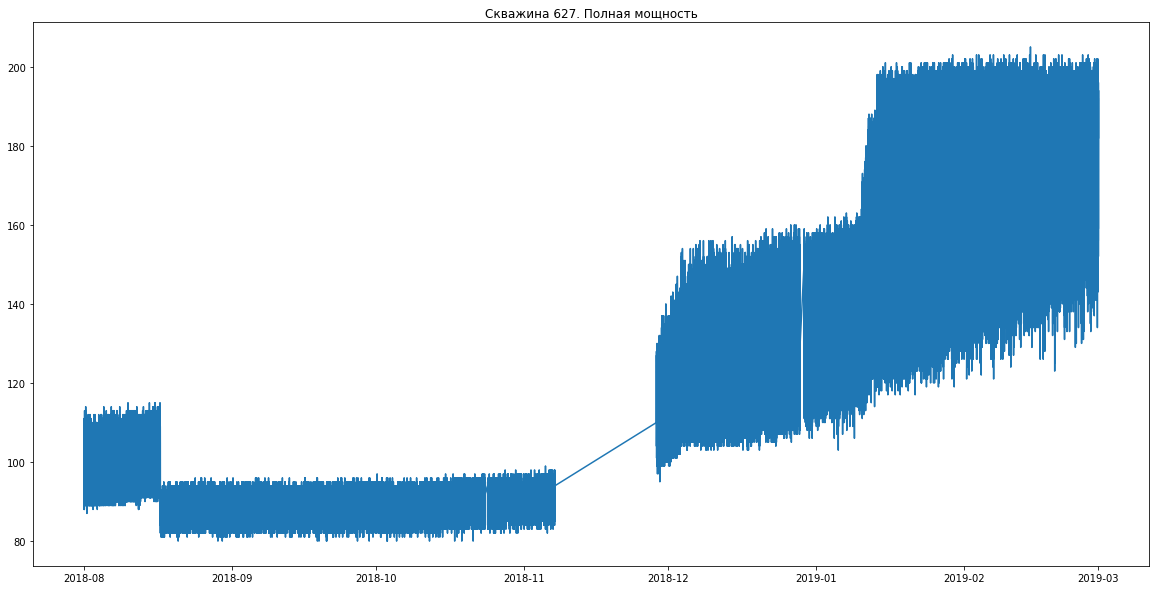

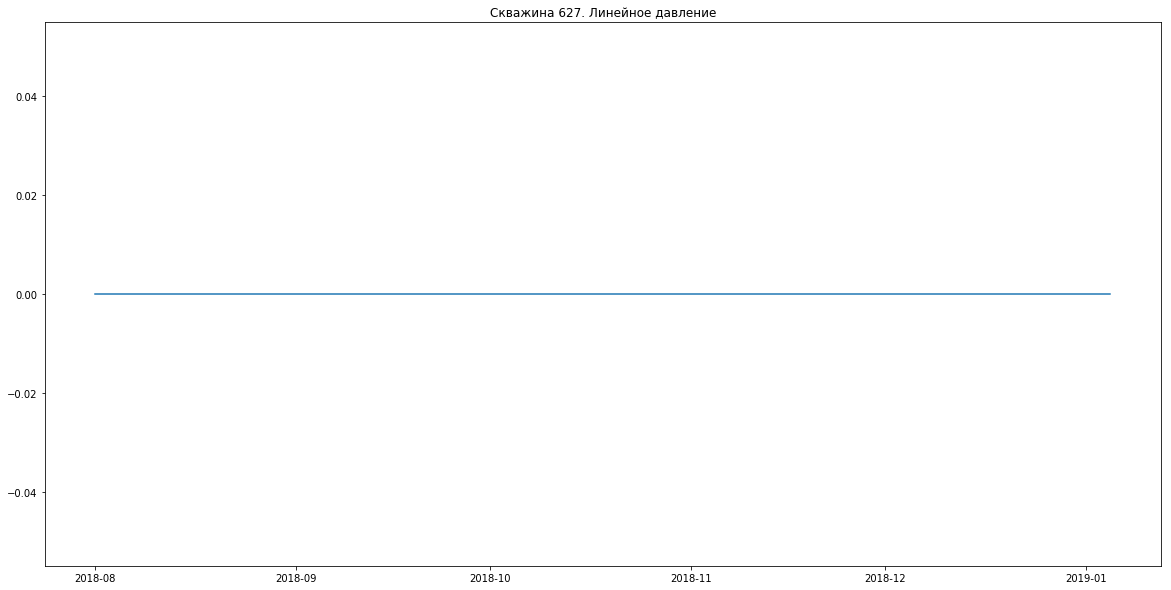

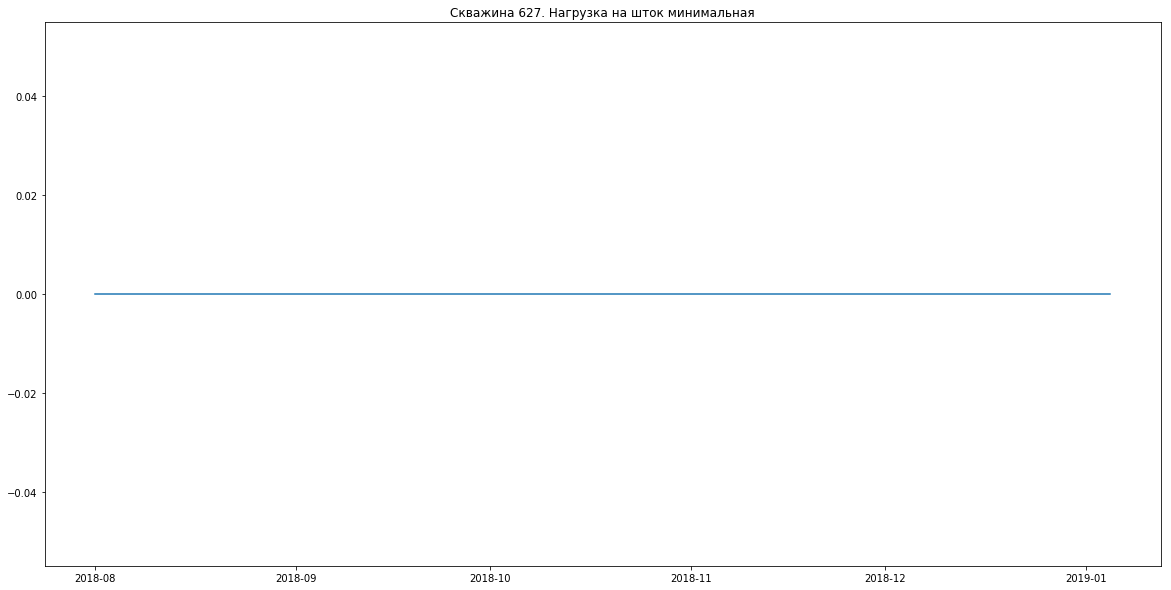

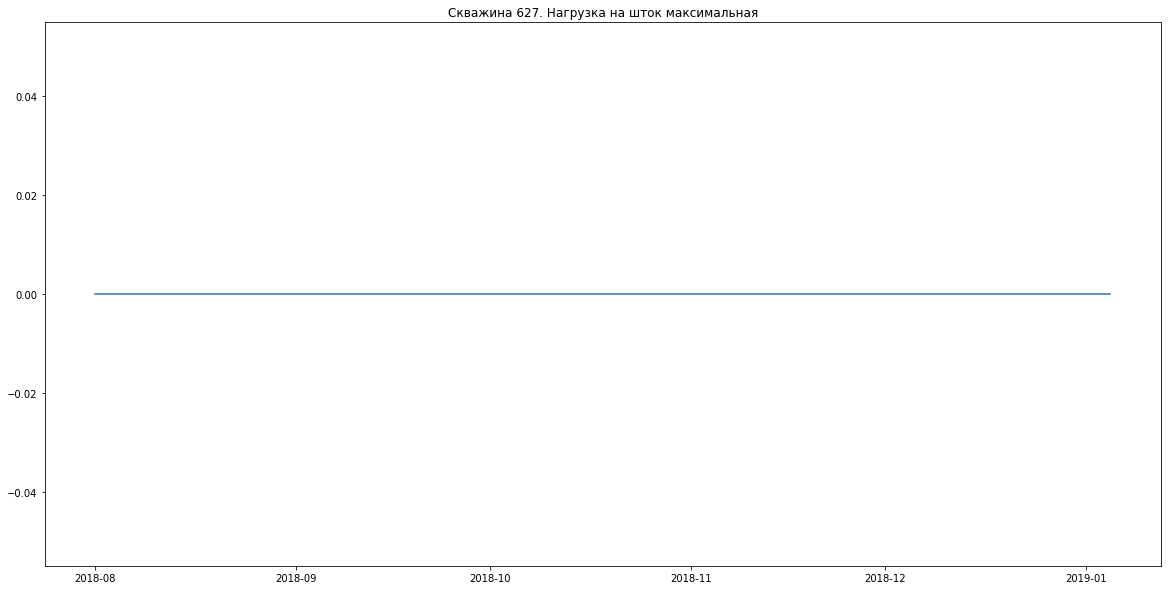

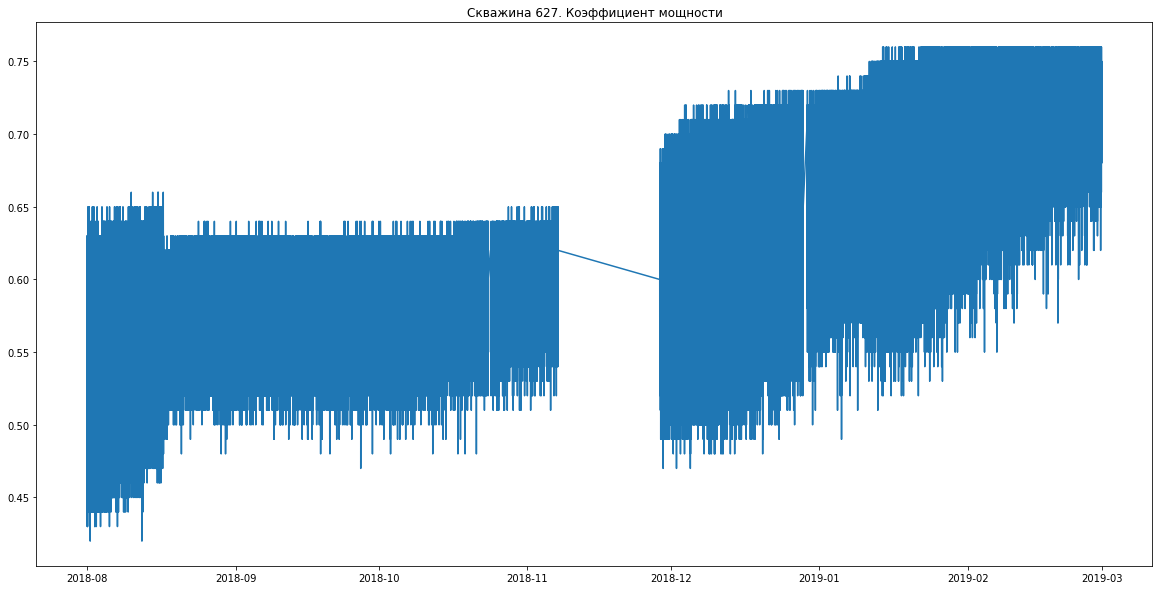

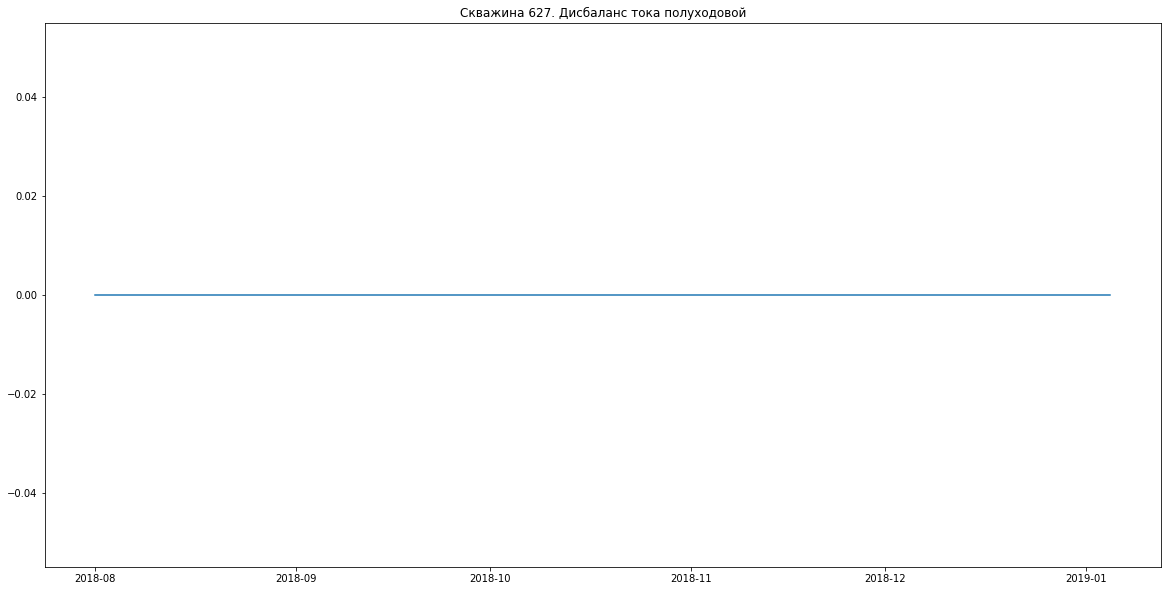

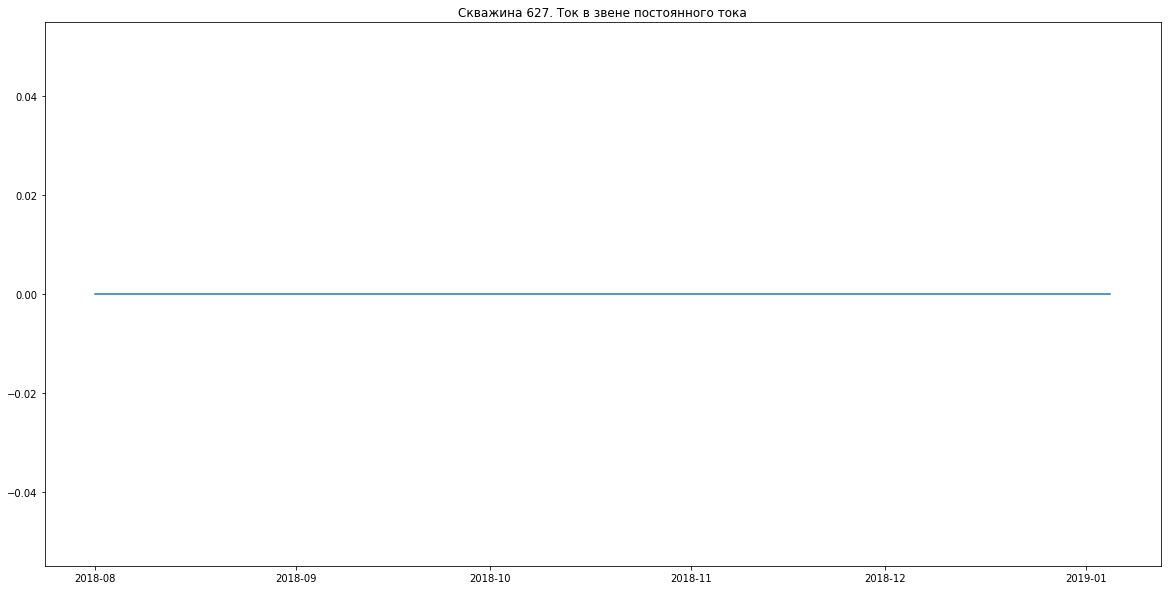

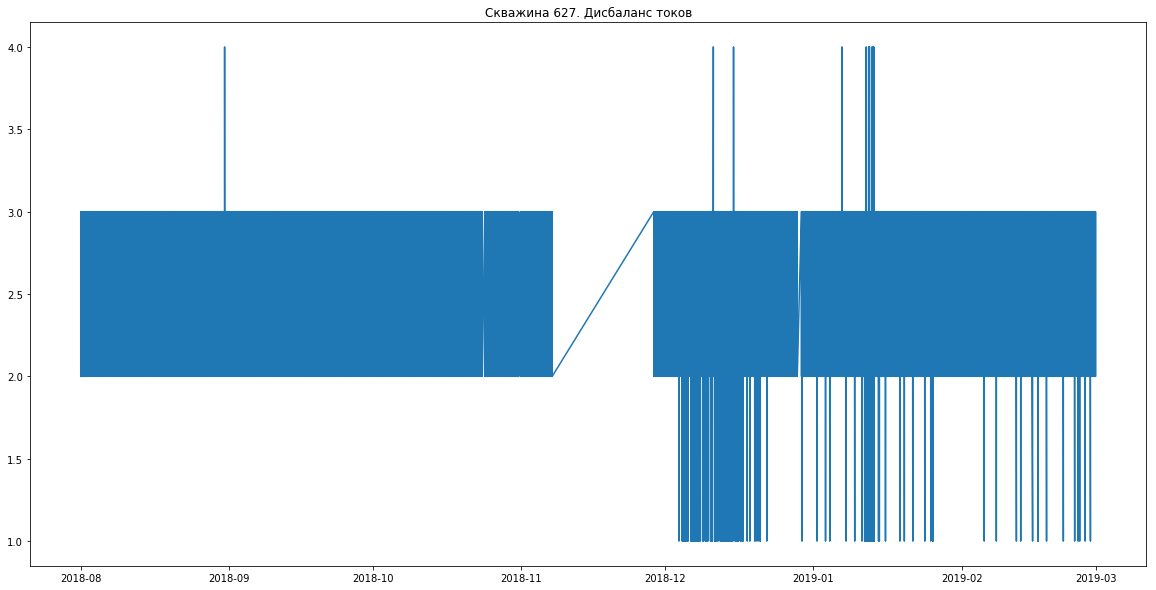

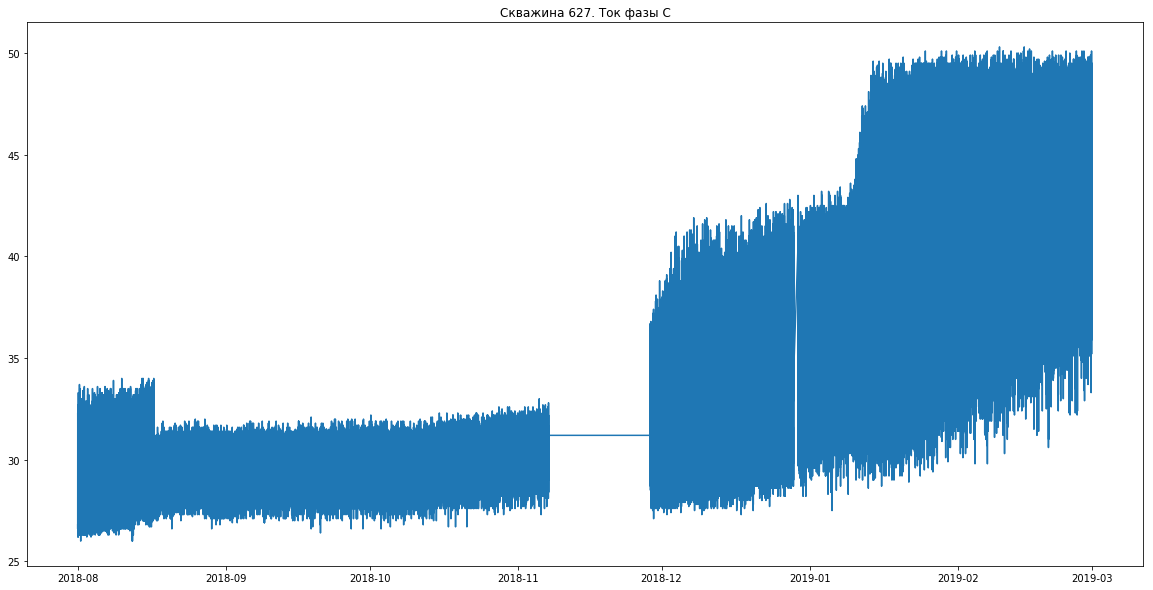

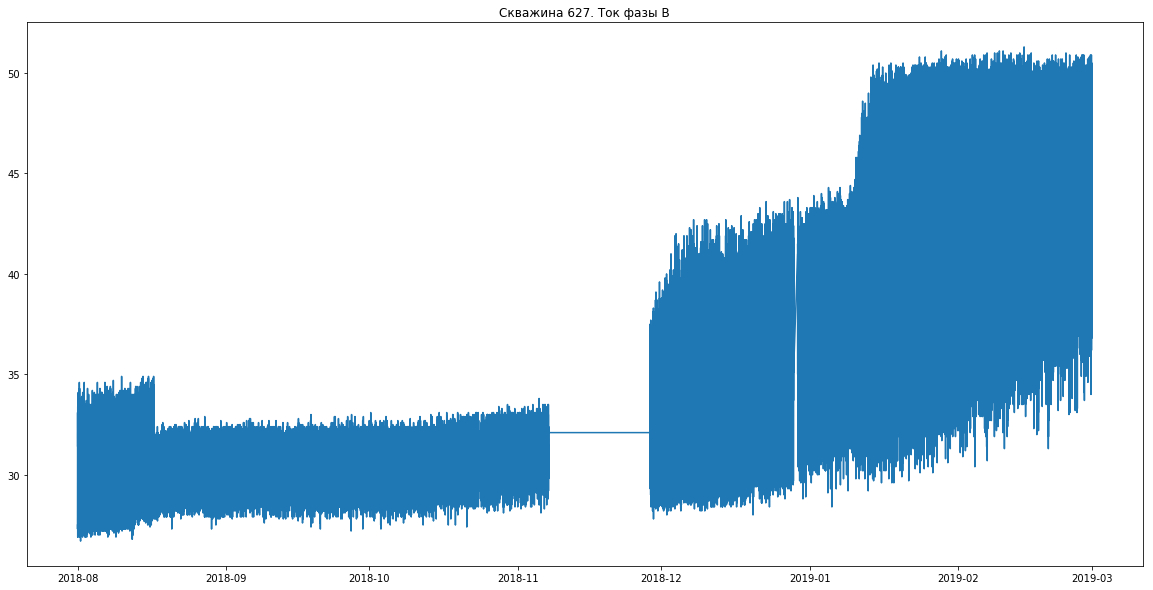

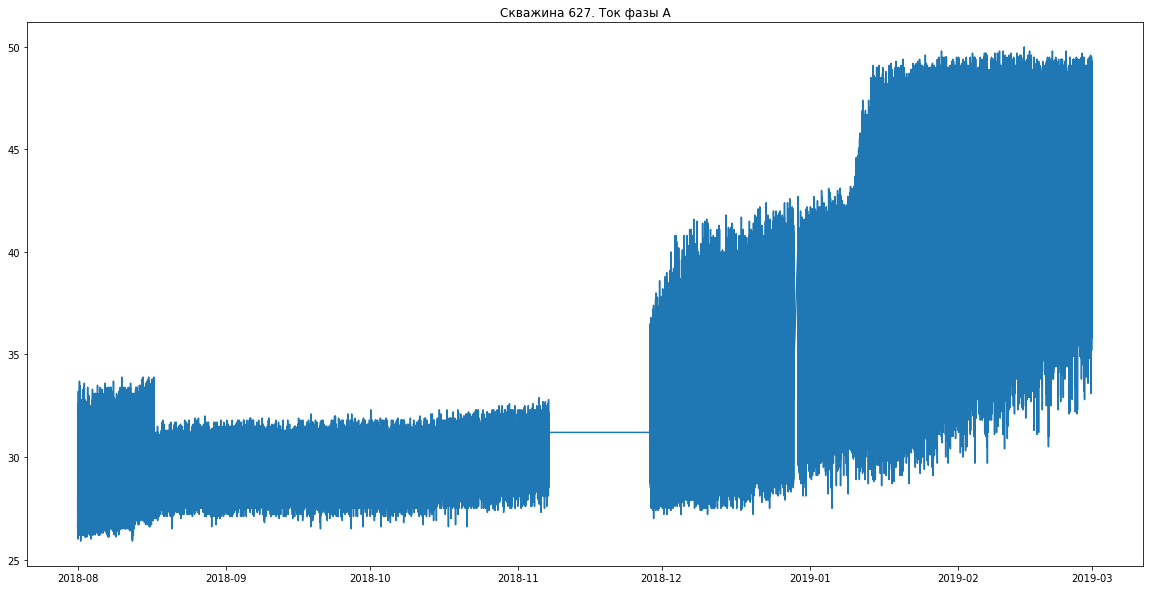

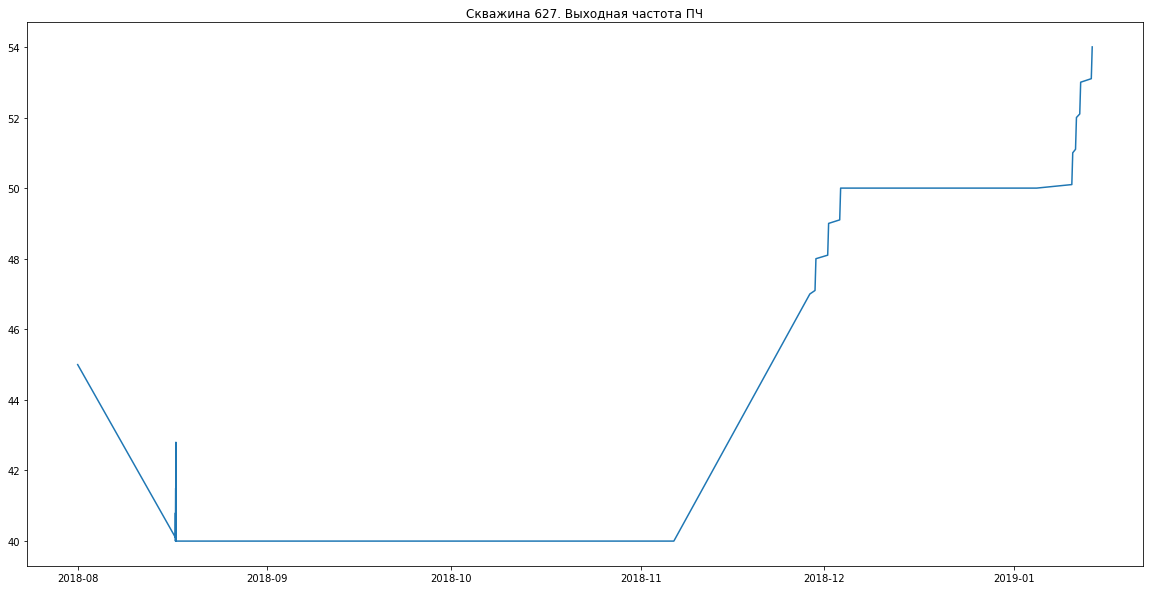

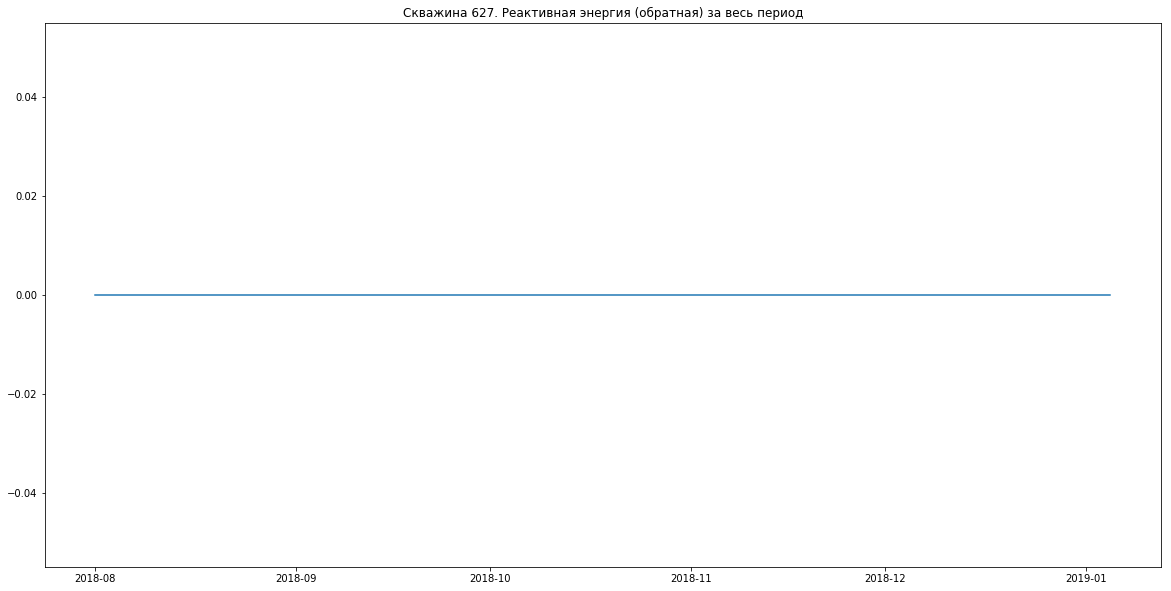

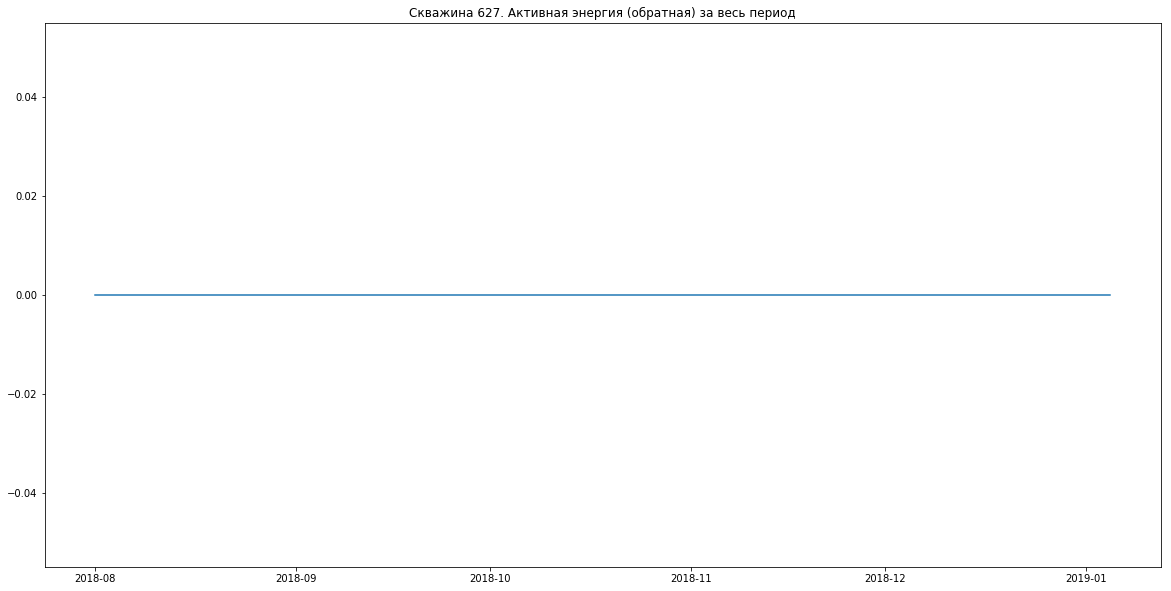

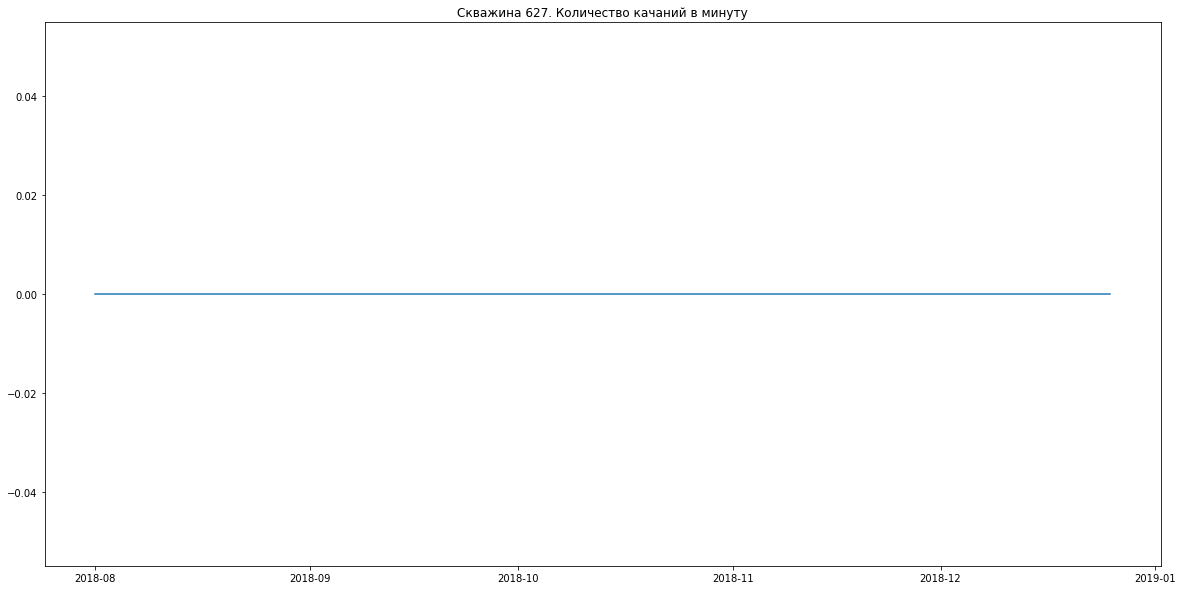

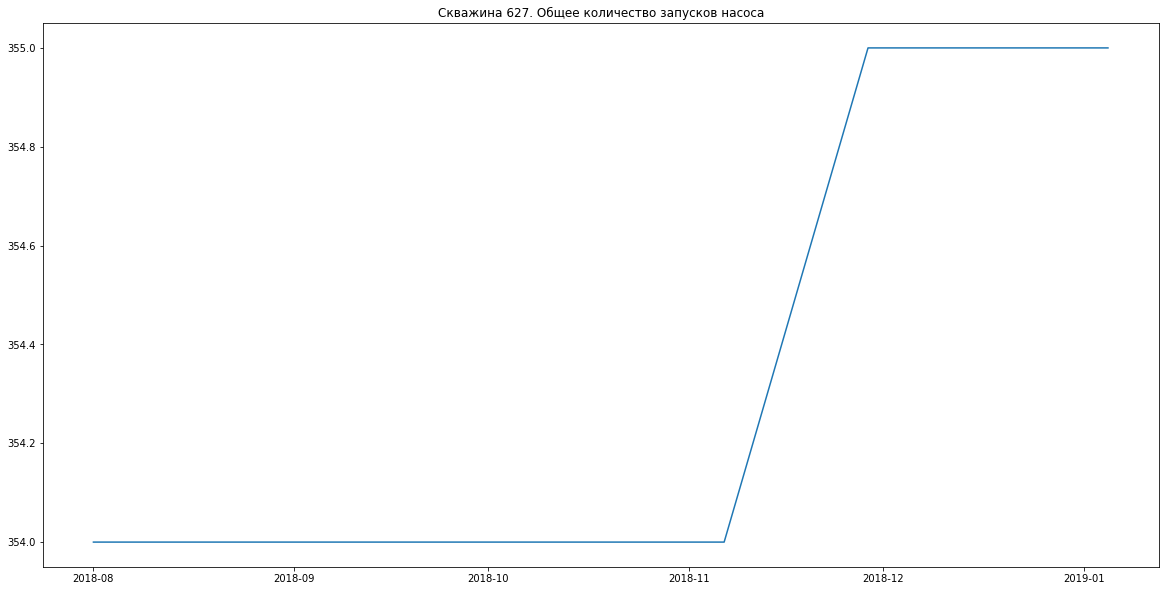

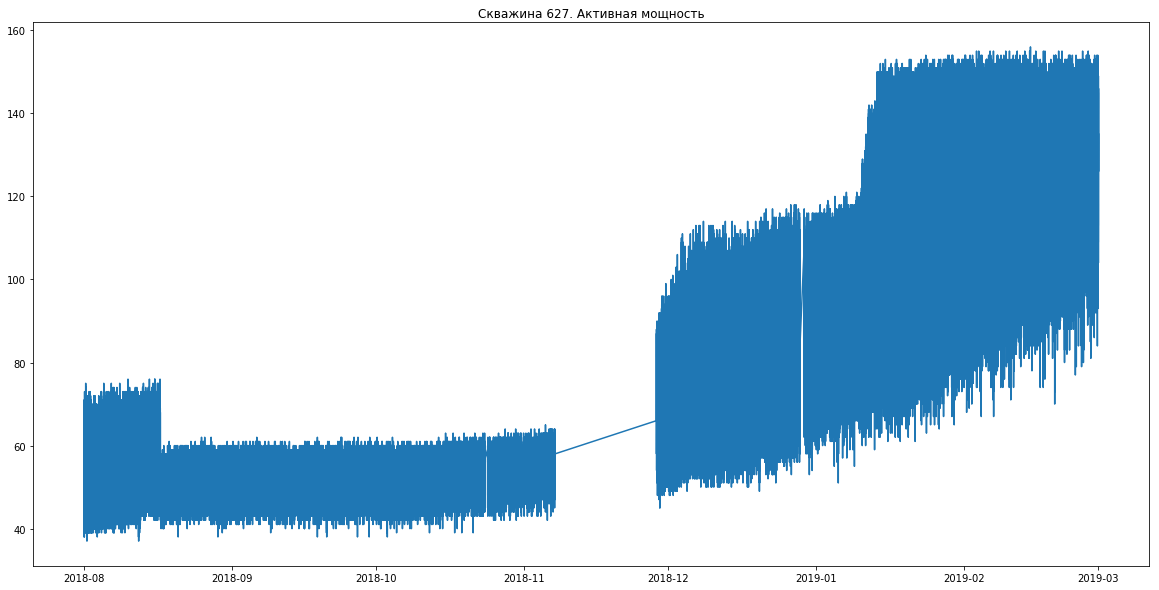

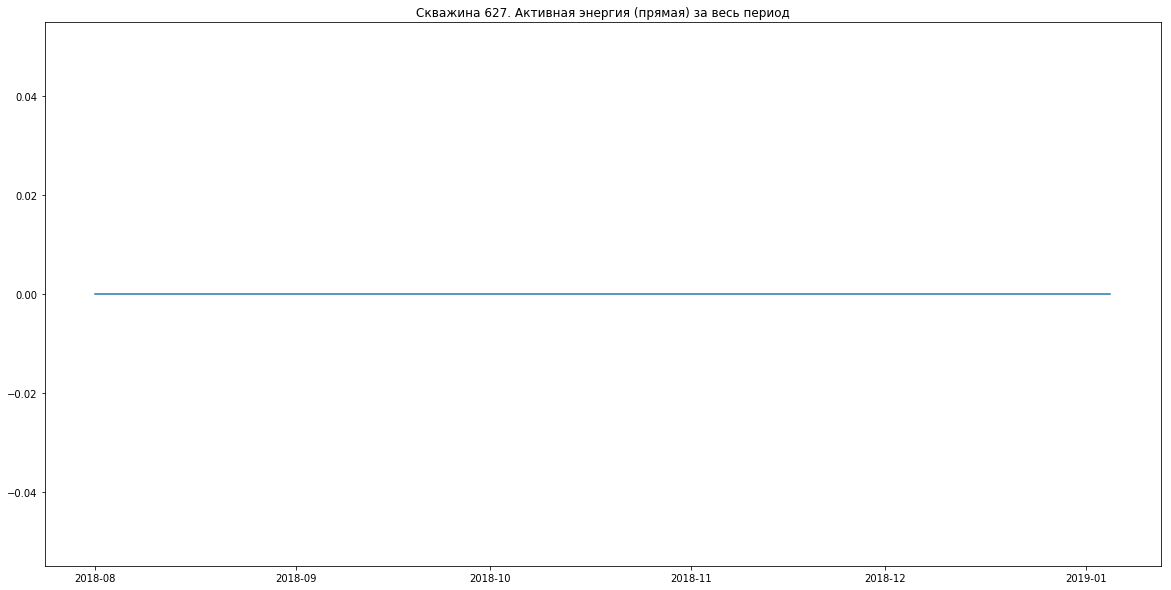

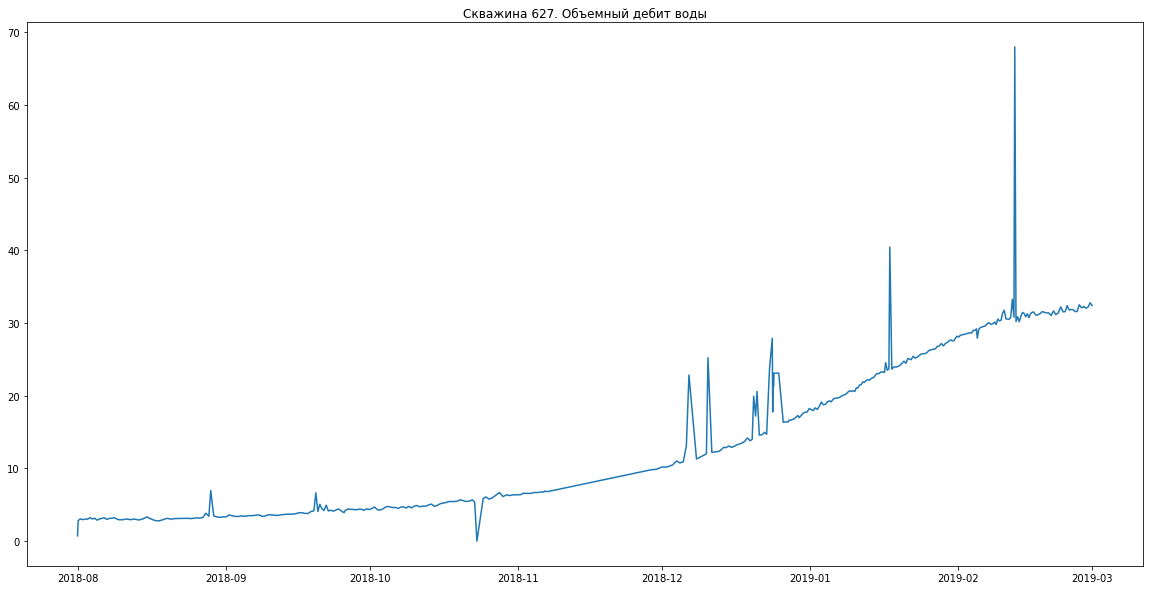

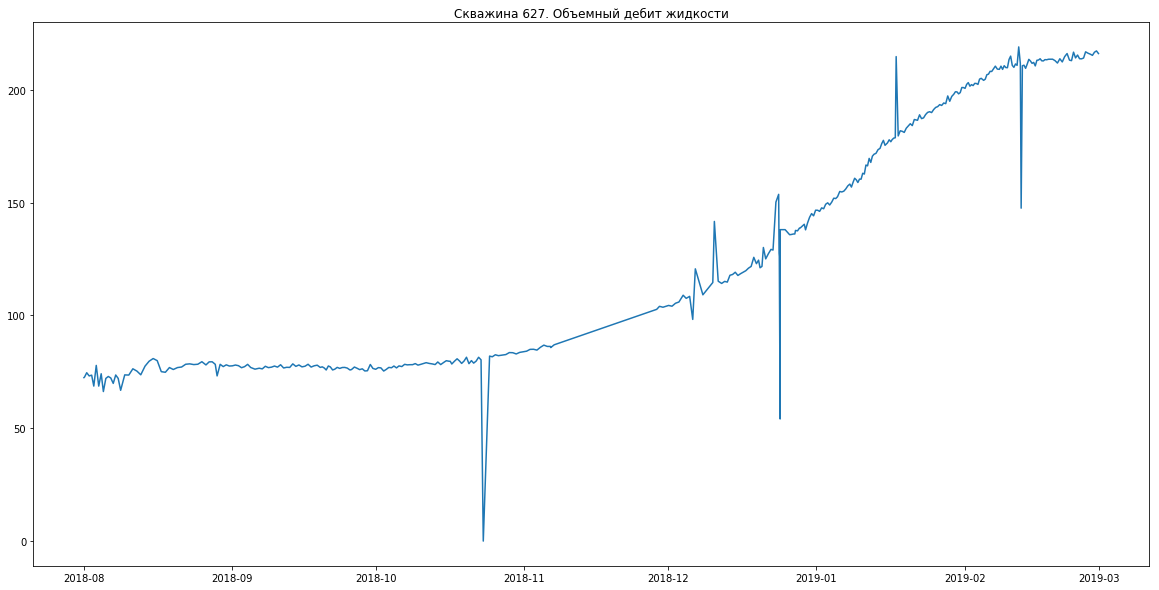

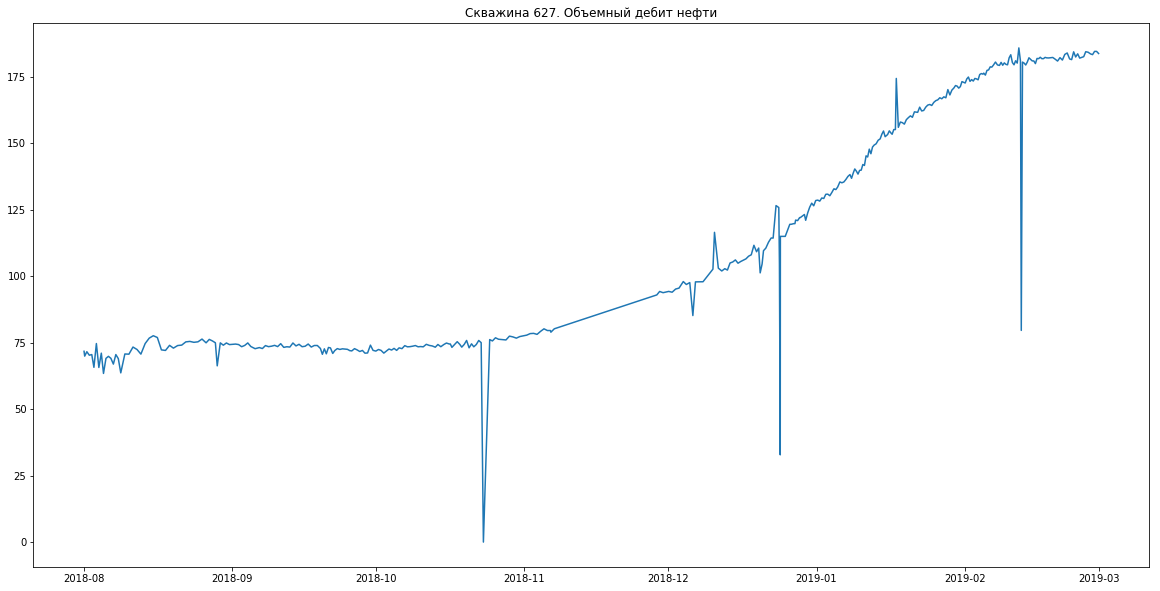

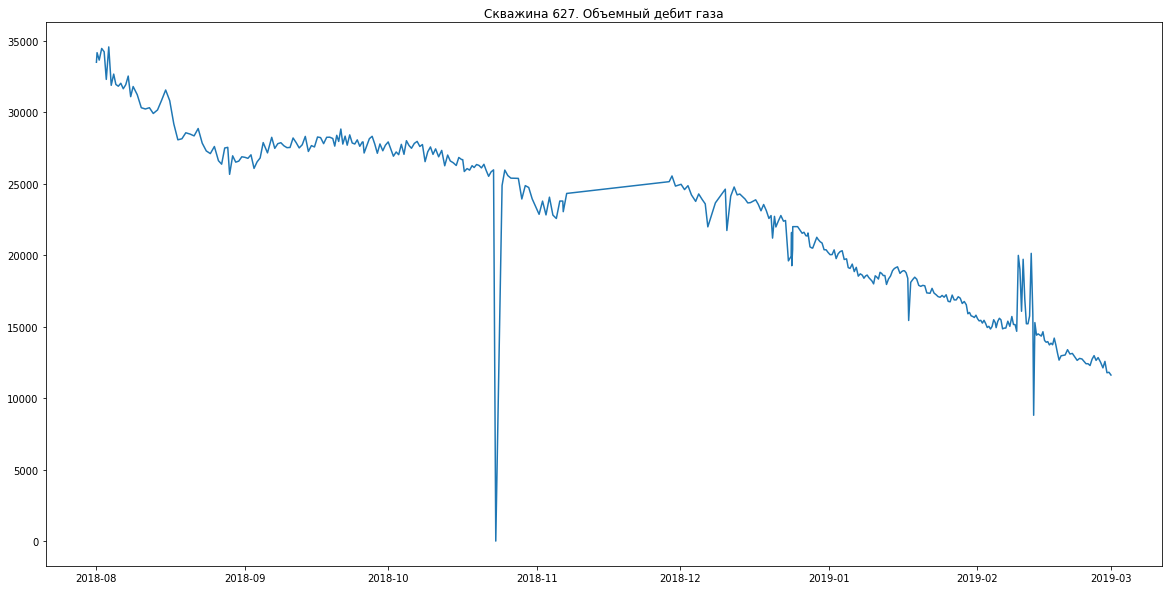

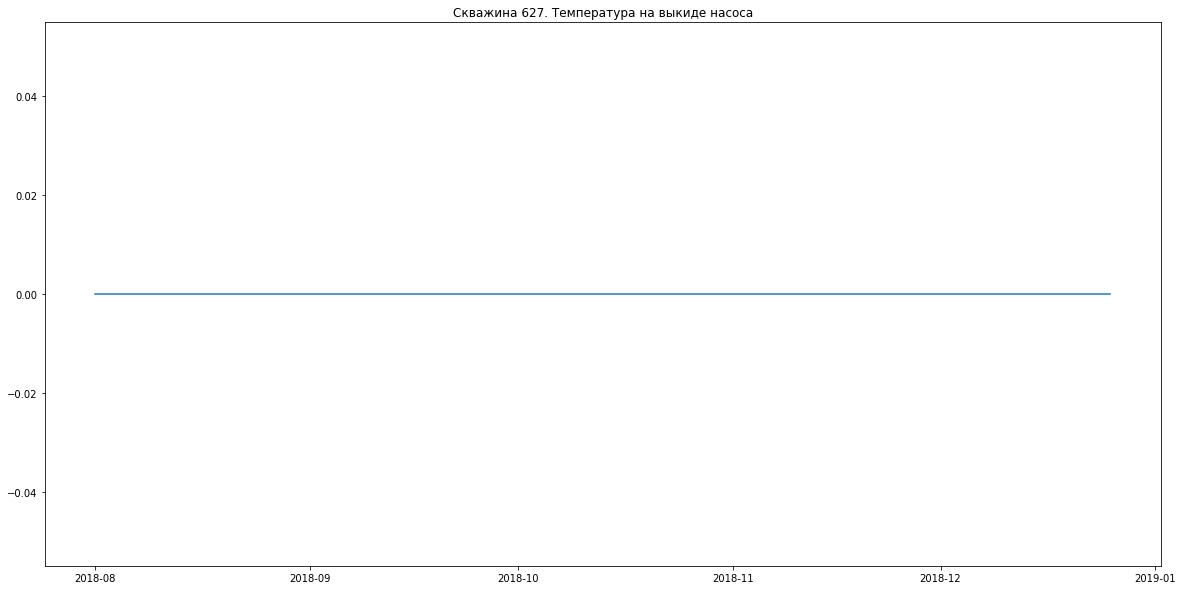

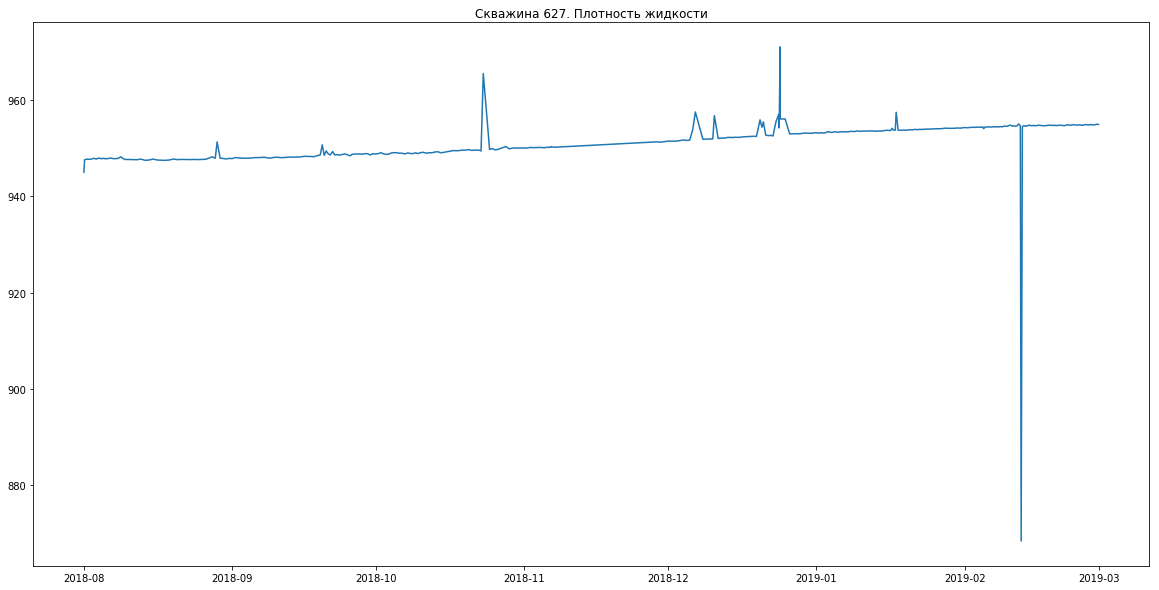

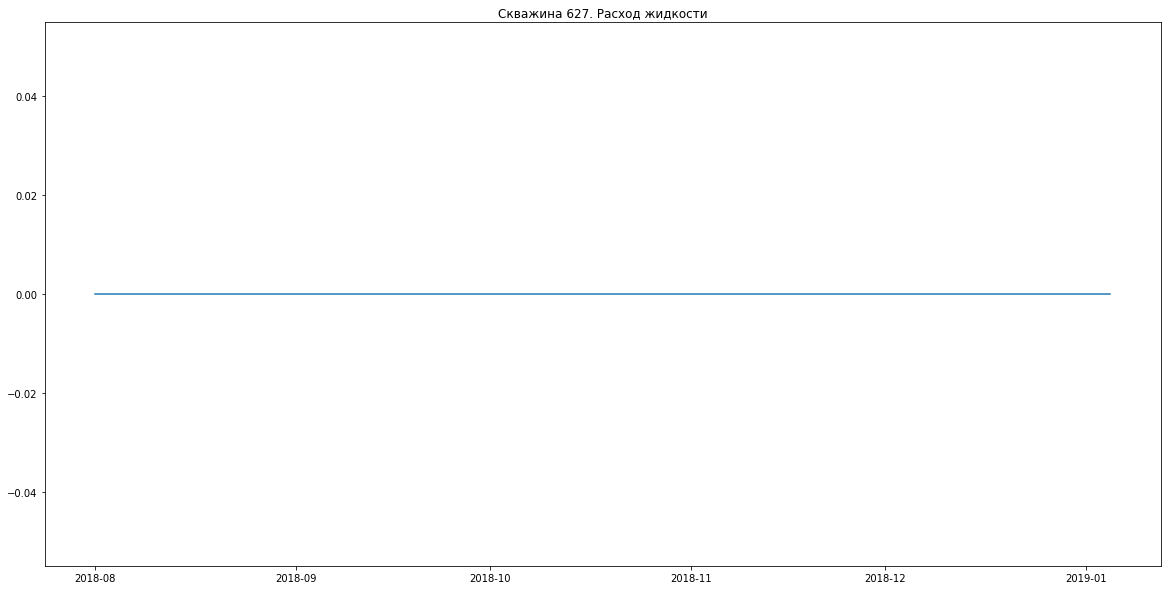

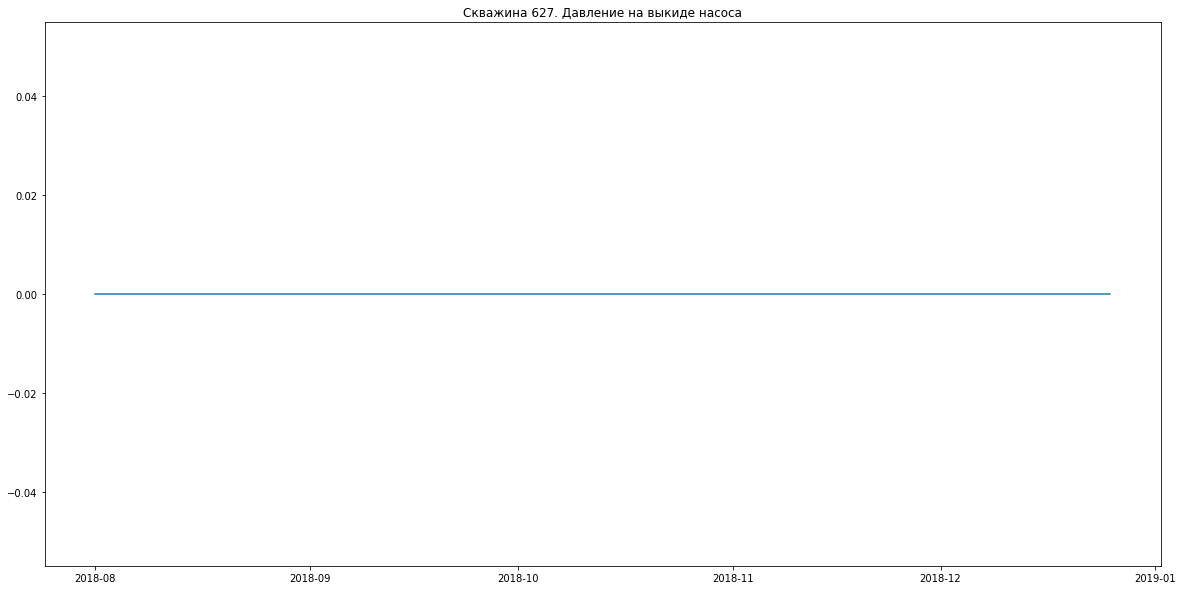

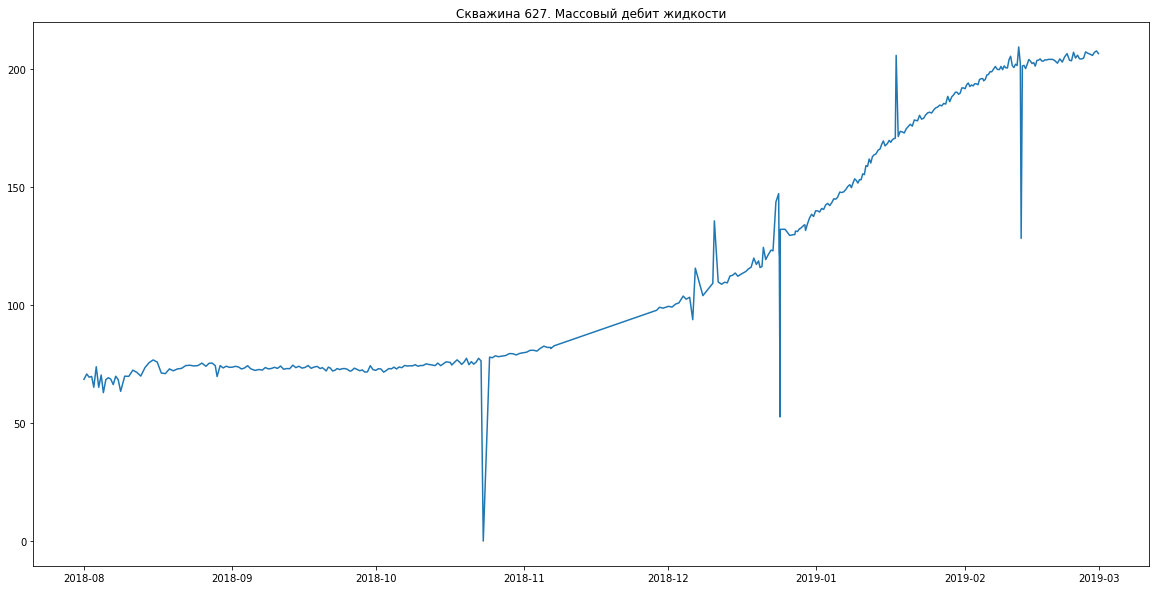

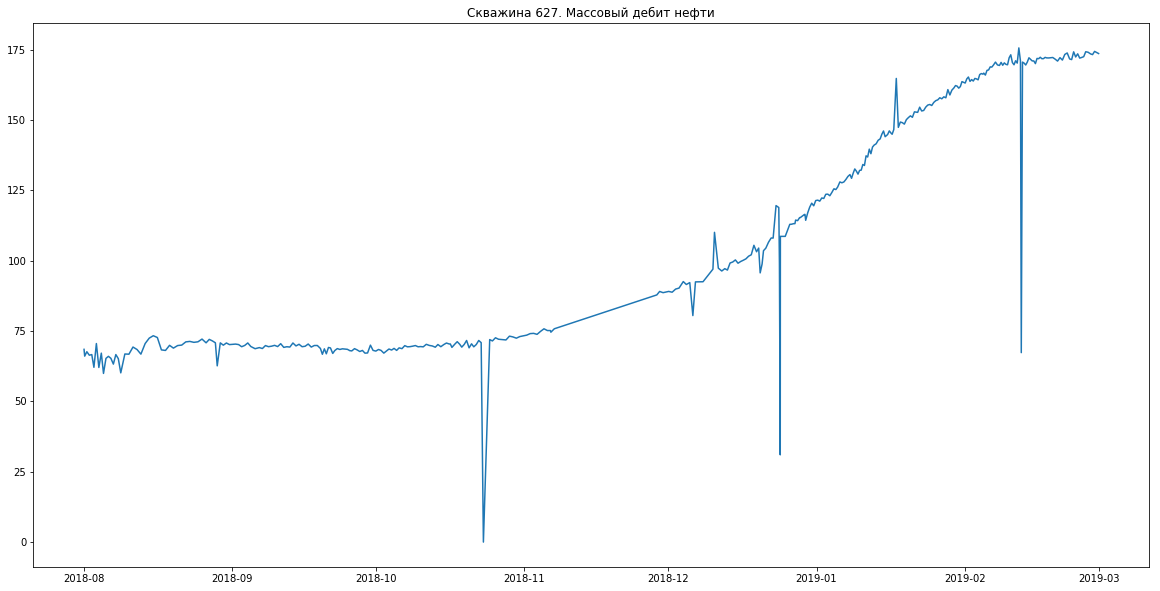

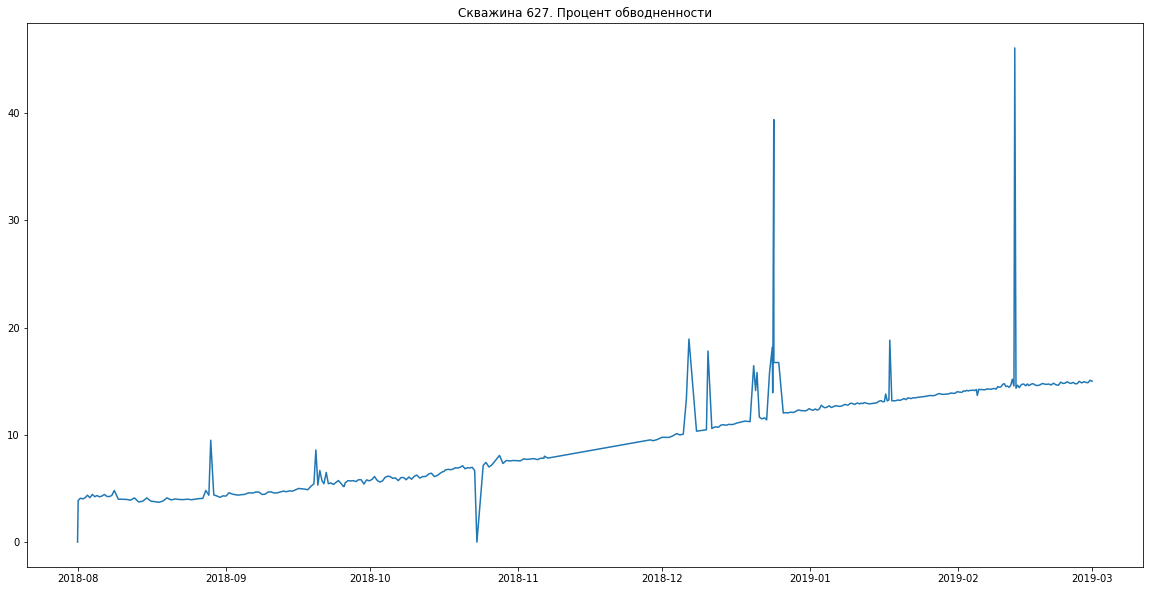

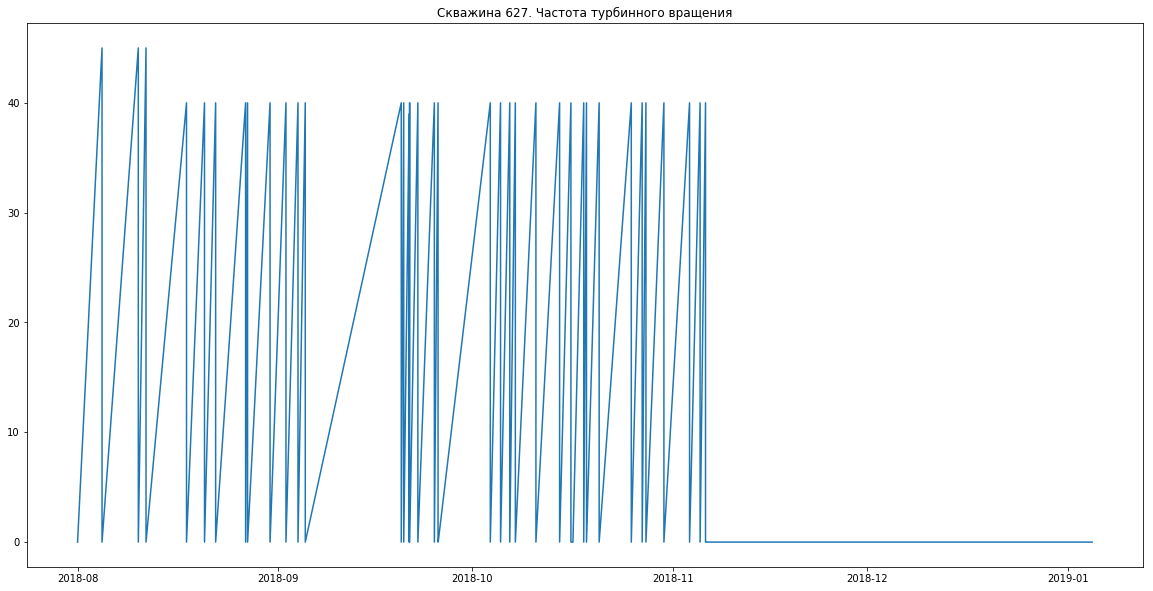

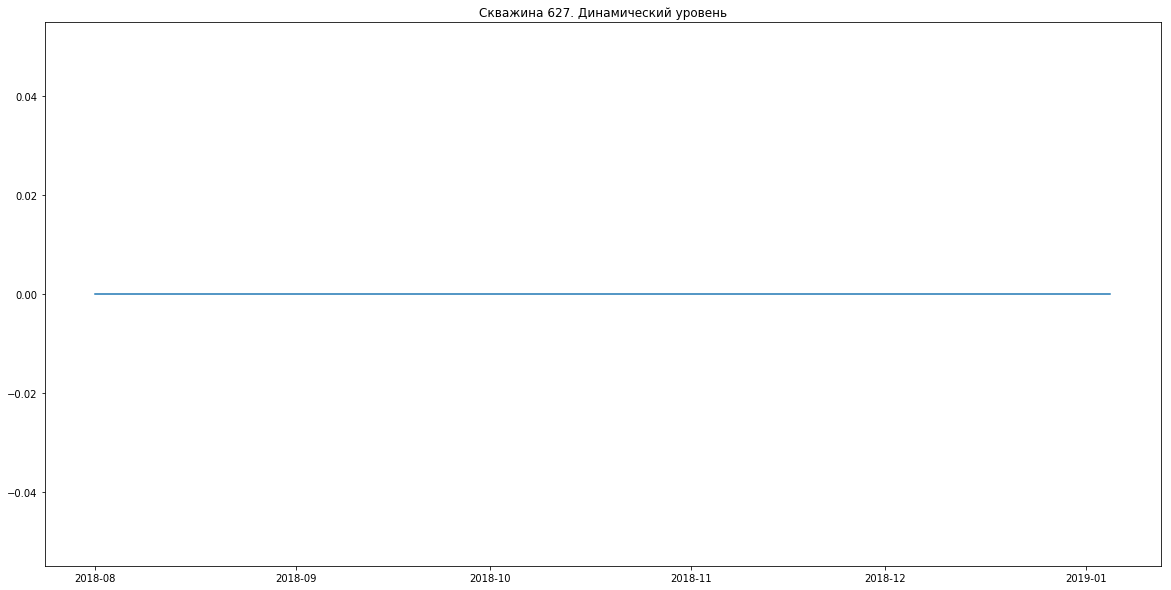

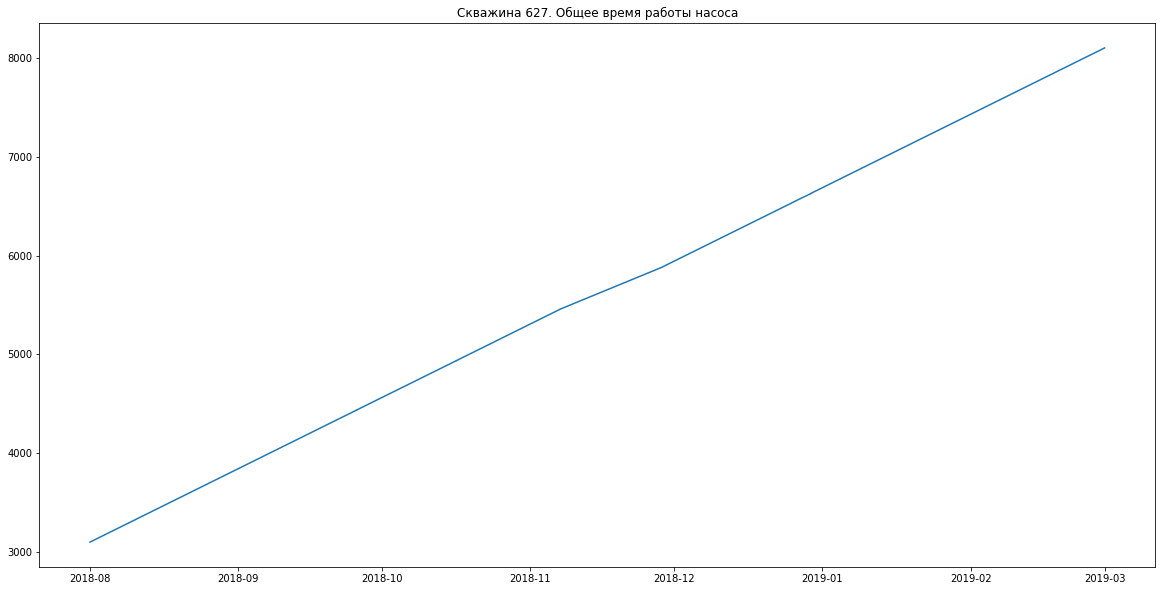

In [9]:
temp_data = pd.DataFrame(columns = data_new.columns)
for param in data_new.columns:
    temp_data = data_new[param].dropna()
    #time = temp_data['Дата'].values
    #temp_data = temp_data[param].values
    plotting(temp_data, param[17:])



Text(0.5,1,'Гисторгамма. Скважина 627. Загрузка двигателя')

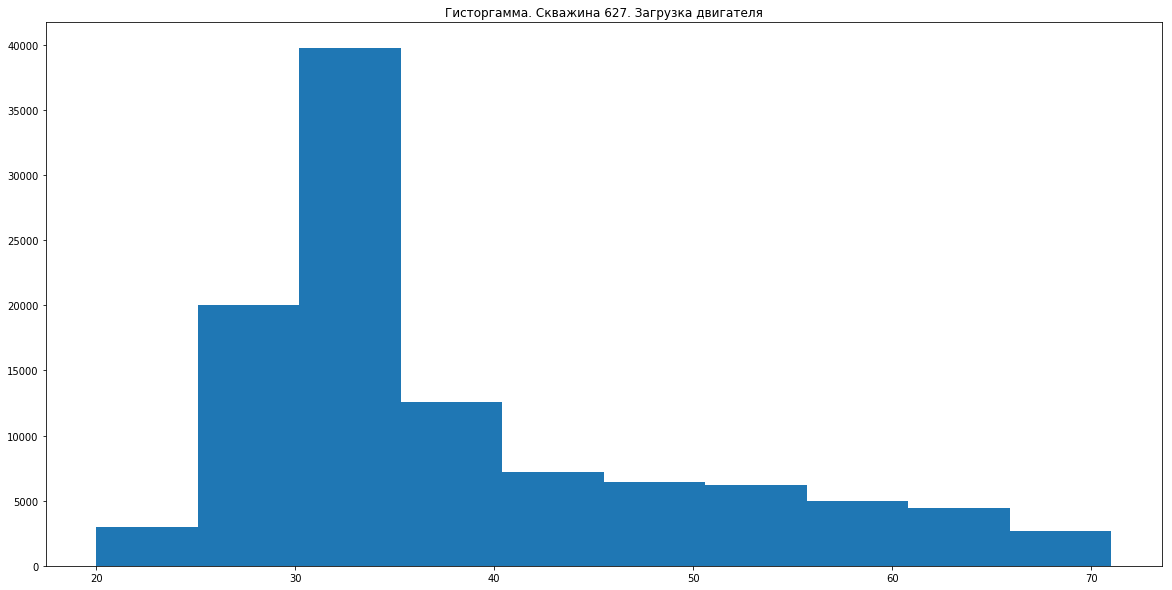

In [10]:
data_new.columns
#plt.hist(data_new['КУСТ 74. ГЗУ 74. Скважина 627. Загрузка двигателя'].values)
plt.hist(data_new['КУСТ 74. ГЗУ 74. Скважина 627. Загрузка двигателя'].dropna())
plt.title('Гисторгамма. Скважина 627. Загрузка двигателя')

In [20]:
data = pd.read_csv('1354.csv', header = None, sep = ";")
data.drop(columns = [0], inplace=True)


0          КУСТ 18. ГЗУ 18А. Скважина 1354. Общее время р...
1          КУСТ 18. ГЗУ 18А. Скважина 1354. Динамический ...
2          КУСТ 18. ГЗУ 18А. Скважина 1354. Частота турби...
3          КУСТ 18. ГЗУ 18А. Скважина 1354. Процент обвод...
4          КУСТ 18. ГЗУ 18А. Скважина 1354. Массовый деби...
5          КУСТ 18. ГЗУ 18А. Скважина 1354. Массовый деби...
6          КУСТ 18. ГЗУ 18А. Скважина 1354. Давление на в...
7           КУСТ 18. ГЗУ 18А. Скважина 1354. Расход жидкости
8          КУСТ 18. ГЗУ 18А. Скважина 1354. Плотность жид...
9          КУСТ 18. ГЗУ 18А. Скважина 1354. Температура н...
10         КУСТ 18. ГЗУ 18А. Скважина 1354. Объемный деби...
11         КУСТ 18. ГЗУ 18А. Скважина 1354. Объемный деби...
12         КУСТ 18. ГЗУ 18А. Скважина 1354. Объемный деби...
13         КУСТ 18. ГЗУ 18А. Скважина 1354. Объемный деби...
14         КУСТ 18. ГЗУ 18А. Скважина 1354. Активная энер...
15         КУСТ 18. ГЗУ 18А. Скважина 1354. Активная мощн...
16         КУСТ 18. ГЗУ 